<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#IEEE-CIS-Fraud-Detection" data-toc-modified-id="IEEE-CIS-Fraud-Detection-1">IEEE-CIS Fraud Detection</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.1">Imports</a></span></li><li><span><a href="#Reading-in-and-merging-dataframes" data-toc-modified-id="Reading-in-and-merging-dataframes-1.2">Reading in and merging dataframes</a></span></li><li><span><a href="#Data-exploration" data-toc-modified-id="Data-exploration-1.3">Data exploration</a></span><ul class="toc-item"><li><span><a href="#Column-stats-grouped-by-fraud-status" data-toc-modified-id="Column-stats-grouped-by-fraud-status-1.3.1">Column stats grouped by fraud status</a></span></li><li><span><a href="#Missing-values" data-toc-modified-id="Missing-values-1.3.2">Missing values</a></span></li><li><span><a href="#List-of-categorical-columns" data-toc-modified-id="List-of-categorical-columns-1.3.3">List of categorical columns</a></span></li><li><span><a href="#ProductCD-(categorical)" data-toc-modified-id="ProductCD-(categorical)-1.3.4">ProductCD (categorical)</a></span></li><li><span><a href="#card1---card6-(categorical)" data-toc-modified-id="card1---card6-(categorical)-1.3.5">card1 - card6 (categorical)</a></span></li><li><span><a href="#TransactionDT,-TransactionID,-TransactionAmt-(continuous)" data-toc-modified-id="TransactionDT,-TransactionID,-TransactionAmt-(continuous)-1.3.6">TransactionDT, TransactionID, TransactionAmt (continuous)</a></span></li><li><span><a href="#addr1,-addr2-(categorical)" data-toc-modified-id="addr1,-addr2-(categorical)-1.3.7">addr1, addr2 (categorical)</a></span></li><li><span><a href="#dist1,-dist2-(continuous)" data-toc-modified-id="dist1,-dist2-(continuous)-1.3.8">dist1, dist2 (continuous)</a></span></li><li><span><a href="#P_emaildomain,--R_emaildomain-(categorical)" data-toc-modified-id="P_emaildomain,--R_emaildomain-(categorical)-1.3.9">P_emaildomain,  R_emaildomain (categorical)</a></span></li><li><span><a href="#C1---C14-(continuous)" data-toc-modified-id="C1---C14-(continuous)-1.3.10">C1 - C14 (continuous)</a></span></li><li><span><a href="#D1---D15--(continuous)" data-toc-modified-id="D1---D15--(continuous)-1.3.11">D1 - D15  (continuous)</a></span></li><li><span><a href="#M1---M9-(categorical)" data-toc-modified-id="M1---M9-(categorical)-1.3.12">M1 - M9 (categorical)</a></span></li><li><span><a href="#V1---V339-(continuous)" data-toc-modified-id="V1---V339-(continuous)-1.3.13">V1 - V339 (continuous)</a></span></li><li><span><a href="#id_1---id_11-(continuous)" data-toc-modified-id="id_1---id_11-(continuous)-1.3.14">id_1 - id_11 (continuous)</a></span></li><li><span><a href="#id_12---id_38-(categorical)" data-toc-modified-id="id_12---id_38-(categorical)-1.3.15">id_12 - id_38 (categorical)</a></span></li><li><span><a href="#Devicetype,-DeviceInfo-(categorical)" data-toc-modified-id="Devicetype,-DeviceInfo-(categorical)-1.3.16">Devicetype, DeviceInfo (categorical)</a></span></li></ul></li><li><span><a href="#Creating-simplified-data-sets-for--experimentation" data-toc-modified-id="Creating-simplified-data-sets-for--experimentation-1.4">Creating simplified data sets for  experimentation</a></span><ul class="toc-item"><li><span><a href="#Random-sampling-of-the-test-set" data-toc-modified-id="Random-sampling-of-the-test-set-1.4.1">Random sampling of the test set</a></span></li><li><span><a href="#Simplfication-of-data-set" data-toc-modified-id="Simplfication-of-data-set-1.4.2">Simplfication of data set</a></span></li></ul></li></ul></li></ul></div>

# IEEE-CIS Fraud Detection

## Imports

In [803]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [804]:
import sys
from zipfile import ZipFile
from pathlib import Path
import pandas as pd
import multiprocessing as mp
import torch
import datetime
from functools import partial
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.options.display.max_columns = None
pd.options.display.max_rows = 500

In [805]:
path = Path('/Users/baranserajelahi/Codes/fraud-detection-pytorch-scikit-fastai/data')

In [806]:
Path.BASE_PATH = path

In [807]:
# with ZipFile('ieee-fraud-detection.zip', 'r') as zip_ref:
#     zip_ref.extractall(path/'Data')

## Reading in and merging dataframes

In [6]:
files = [path/'test_identity.csv', 
         path/'test_transaction.csv',
         path/'train_identity.csv',
         path/'train_transaction.csv']

In [ ]:
%%time
def read_data(file):
    return pd.read_csv(file, low_memory=False)

with mp.Pool() as pool:
    test_id, test_tr, train_id, train_tr = pool.map(read_data, files)   

In [ ]:
train = pd.merge(train_tr, train_id, on='TransactionID', how='left')
test = pd.merge(test_tr, test_id, on='TransactionID', how='left')

In [ ]:
train.to_csv(path/'train.csv')
test.to_csv(path/'test.csv')

In [808]:
train = pd.read_csv(path/'train.csv', index_col=[0], low_memory=False)
test = pd.read_csv(path/'test.csv', index_col=[0], low_memory=False)

## Data exploration 

In [809]:
print(f'Train dataset has {train.shape[0]} rows and {train.shape[1]} columns.')
print(f'Test dataset has {test.shape[0]} rows and {test.shape[1]} columns.')

Train dataset has 590540 rows and 434 columns.
Test dataset has 506691 rows and 433 columns.


In [810]:
train.head()

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5   card6  addr1  addr2  dist1  dist2  \
0    NaN  150.0    discover  142.0  credit  315.0   87.0   19.0    NaN   
1  404.0  150.0  mastercard  102.0  credit  325.0   87.0    NaN    NaN   
2  490.0  150.0        visa  166.0   debit  330.0   87.0  287.0    NaN   
3  567.0  150.0  mastercard  117.0   debit  476.0   87.0    NaN    NaN   
4  514.0  150.0  mastercard  102.0  credit  420.0   87.0    NaN    NaN   

  P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8   C9  \
0           NaN           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
1     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2   outlook.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
3     yahoo.com           NaN  2.0  5.0  0.0  0.0  0.0  4.0  0.0  0.0  1.0   
4     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   

   C10  C11  C12   C13  C14     D1     D2    D3    D4   D5  D6  D7  D8  D9  \
0  0.0  2.0  0.0   1.0  1.0   14.0    NaN  13.0   NaN  NaN NaN NaN NaN NaN   
1  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN NaN NaN NaN   
2  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN NaN NaN NaN   
3  0.0  1.0  0.0  25.0  1.0  112.0  112.0   0.0  94.0  0.0 NaN NaN NaN NaN   
4  1.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   NaN  NaN NaN NaN NaN NaN   

    D10    D11  D12  D13  D14    D15   M1   M2   M3   M4   M5   M6   M7   M8  \
0  13.0   13.0  NaN  NaN  NaN    0.0    T    T    T   M2    F    T  NaN  NaN   
1   0.0    NaN  NaN  NaN  NaN    0.0  NaN  NaN  NaN   M0    T    T  NaN  NaN   
2   0.0  315.0  NaN  NaN  NaN  315.0    T    T    T   M0    F    F    F    F   
3  84.0    NaN  NaN  NaN  NaN  111.0  NaN  NaN  NaN   M0    T    F  NaN  NaN   
4   NaN    NaN  NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

    M9   V1   V2   V3   V4   V5   V6   V7   V8   V9  V10  V11  V12  V13  V14  \
0  NaN  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0  1.0   
2    F  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  1.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V15  V16  V17  V18  V19  V20  V21  V22  V23  V24  V25  V26  V27  V28  V29  \
0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V30  V31  V32  V33  V34  V35  V36  V37  V38  V39  V40  V41  V42  V43  V44  \
0  0.0  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
2  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
3  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V45  V46  V47  V48  V49  V50  V51  V52  V53  V54  V55  V56  V57  V58  V59  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
1  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  

<AxesSubplot:xlabel='isFraud', ylabel='Value counts'>

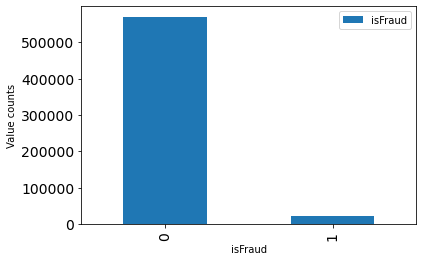

In [811]:
train['isFraud'].value_counts().plot.bar(xlabel='isFraud', ylabel='Value counts', 
                                         fontsize=14, legend=True)

In [466]:
train['isFraud'].mean()

0.03499000914417313

This indicates that there is class imbalance of about 1 to 30.

### Column stats grouped by fraud status

In [468]:
print('Mean of values')
train.groupby(by='isFraud').mean()

Mean of values


TransactionID  TransactionDT  TransactionAmt        card1  \
isFraud                                                              
0         3.281810e+06   7.360791e+06      134.511665  9911.464381   
1         3.294952e+06   7.690033e+06      149.244779  9547.654164   

              card2       card3       card5       addr1      addr2  \
isFraud                                                              
0        362.453981  152.862034  199.542212  290.643341  86.813620   
1        365.370850  162.368648  191.994328  294.317134  86.286024   

              dist1       dist2         C1         C2        C3         C4  \
isFraud                                                                      
0        117.360098  235.199758  13.314952  14.173283  0.005840   3.693878   
1        174.588854  201.472259  35.535740  45.509413  0.000242  15.077336   

               C5         C6         C7         C8        C9        C10  \
isFraud                                                                   
0        5.722537   8.786377   2.517484   4.560881  4.580904   4.723526   
1        1.406717  16.923148  11.977157  21.242608  1.703964  19.493926   

               C11        C12        C13        C14         D1          D2  \
isFraud                                                                      
0         9.747825   3.549703  32.814474   8.220491  96.364705  171.956223   
1        23.857475  18.597541  24.967768  10.356047  38.711306   77.774206   

                D3          D4         D5         D6         D7          D8  \
isFraud                                                                       
0        28.845357  142.432339  43.491155  72.629046  46.943007  157.343727   
1        11.744880   72.102904  13.687776  45.856439  11.292228   49.309191   

               D9         D10         D11        D12        D13        D14  \
isFraud                                                                      
0        0.565846  126.396130  147.808201  55.345787  19.316574  58.152163   
1        0.520000   52.363653   87.314445  44.202553   6.492321  54.464578   

                D15        V1        V2        V3        V4        V5  \
isFraud                                                                 
0        166.633142  0.999944  1.044529  1.075839  0.845671  0.874506   
1         78.245805  1.000000  1.078939  1.189813  0.885686  1.001146   

               V6        V7        V8        V9       V10       V11       V12  \
isFraud                                                                         
0        1.045329  1.071857  1.027282  1.040315  0.469423  0.484609  0.564623   
1        1.063544  1.123485  1.048804  1.102195  0.188667  0.198002  0.413984   

              V13       V14       V15       V16       V17       V18       V19  \
isFraud                                                                         
0        0.603632  0.999492  0.111481  0.112487  0.121817  0.122904  0.813957   
1        0.466679  0.999762  0.444564  0.448975  0.496662  0.505007  0.887995   

              V20       V21       V22       V23       V24       V25       V26  \
isFraud                                                                         
0        0.844440  0.119351  0.121813  1.027997  1.051152  0.977530  0.987428   
1        0.948796  0.436218  0.443193  1.236350  1.264127  0.981521  1.006199   

              V27       V28       V29       V30       V31       V32       V33  \
isFraud                                                                         
0        0.000802  0.000858  0.397952  0.416927  0.130103  0.131586  0.119209   
1        0.000000  0.000000  0.087864  0.095196  0.456962  0.463758  0.471388   

              V34       V35       V36       V37       V38       V39       V40  \
isFraud                                                                         
0        0.127318  0.550122  0.586323  1.084948  1.130063  0.148711  0.156817   
1        0.490284  0.332258  0.380106  1.753964  2.065

In [469]:
print('Standard deviations')
train.groupby(by='isFraud').std()

Standard deviations


TransactionID  TransactionDT  TransactionAmt       card1       card2  \
isFraud                                                                         
0        170754.780926   4.623930e+06      239.395078  4905.67237  157.726065   
1        162040.328443   4.416551e+06      232.212163  4762.05138  159.623511   

             card3      card5       addr1     addr2       dist1       dist2  \
isFraud                                                                       
0        10.904432  41.046975  101.692564  2.607742  370.641879  536.798492   
1        17.495775  45.779886  103.584955  4.936238  424.232313  451.589576   

                 C1          C2        C3          C4         C5          C6  \
isFraud                                                                        
0        127.787969  147.485925  0.153208   65.839255  26.121841   68.689176   
1        242.976260  287.813648  0.015554  125.673738  12.946092  126.298758   

                 C7          C8         C9         C10         C11  \
isFraud                                                              
0         58.860773   91.023016  16.889451   91.239098   90.306569   
1        115.143177  176.695771   8.453280  176.919186  170.966234   

                C12         C13        C14          D1          D2         D3  \
isFraud                                                                         
0         82.601169  127.832166  47.898725  158.973258  177.773639  62.830058   
1        162.082460  165.979050  82.902579  100.915599  128.697847  42.005468   

                 D4         D5          D6          D7          D8        D9  \
isFraud                                                                        
0        192.213375  89.985719  147.600963  105.435756  237.987816  0.314576   
1        140.656090  51.891635  101.424445   46.743057  133.254994  0.333188   

                D10         D11         D12        D13         D14  \
isFraud                                                              
0        183.710646  186.555365  127.166079  70.703174  137.532930   
1        127.051078  146.561013   99.349394  31.330429  126.586127   

                D15        V1        V2        V3        V4        V5  \
isFraud                                                                 
0        203.595694  0.007464  0.237326  0.314484  0.438623  0.471002   
1        151.956762  0.000000  0.351422  0.541936  0.504883  0.665395   

               V6        V7        V8        V9       V10       V11       V12  \
isFraud                                                                         
0        0.237727  0.302124  0.183936  0.222790  0.521856  0.552870  0.508471   
1        0.310700  0.413311  0.271332  0.356576  0.421117  0.447692  0.548667   

              V13       V14       V15       V16       V17       V18       V19  \
isFraud                                                                         
0        0.528395  0.022541  0.318881  0.329104  0.338147  0.344751  0.425176   
1        0.619955  0.015440  0.514612  0.530912  0.738461  0.755766  0.429226   

              V20       V21       V22       V23       V24       V25       V26  \
isFraud                                                                         
0        0.456660  0.327163  0.347641  0.192518  0.261379  0.183299  0.206031   
1        0.525761  0.502972  0.525582  0.860107  0.889503  0.235744  0.289442   

              V27       V28       V29       V30       V31       V32      V33  \
isFraud                                                                        
0        0.029073  0.031653  0.513065  0.557192  0.344070  0.356108  0.32715   
1        0.000000  0.000000  0.307336  0.334857  0.516374  0.538916  0.51841   

              V34       V35       V36       V37       V38       V39       V40  \
isFraud                                                                         
0        0.343634  0.515322  0.536893  0.480715  0.605612  0.413146  0.453107   
1     

There are a number of features such as addr1 that have a mean and std that doesn't change much with fraud status. 
If these columns don't have much predictive value it may be a good idea to drop them.

###  Missing values

In [817]:
train_nulls = train.isnull().drop('isFraud', axis=1)
train_nulls['isFraud'] = train['isFraud']

In [818]:
train_nulls.head()

TransactionID  TransactionDT  TransactionAmt  ProductCD  card1  card2  \
0          False          False           False      False  False   True   
1          False          False           False      False  False  False   
2          False          False           False      False  False  False   
3          False          False           False      False  False  False   
4          False          False           False      False  False  False   

   card3  card4  card5  card6  addr1  addr2  dist1  dist2  P_emaildomain  \
0  False  False  False  False  False  False  False   True           True   
1  False  False  False  False  False  False   True   True          False   
2  False  False  False  False  False  False  False   True          False   
3  False  False  False  False  False  False   True   True          False   
4  False  False  False  False  False  False   True   True          False   

   R_emaildomain     C1     C2     C3     C4     C5     C6     C7     C8  \
0           True  False  False  False  False  False  False  False  False   
1           True  False  False  False  False  False  False  False  False   
2           True  False  False  False  False  False  False  False  False   
3           True  False  False  False  False  False  False  False  False   
4           True  False  False  False  False  False  False  False  False   

      C9    C10    C11    C12    C13    C14     D1     D2     D3     D4  \
0  False  False  False  False  False  False  False   True  False   True   
1  False  False  False  False  False  False  False   True   True  False   
2  False  False  False  False  False  False  False   True   True  False   
3  False  False  False  False  False  False  False  False  False  False   
4  False  False  False  False  False  False  False   True   True   True   

      D5    D6    D7    D8    D9    D10    D11   D12   D13   D14    D15  \
0   True  True  True  True  True  False  False  True  True  True  False   
1   True  True  True  True  True  False   True  True  True  True  False   
2   True  True  True  True  True  False  False  True  True  True  False   
3  False  True  True  True  True  False   True  True  True  True  False   
4   True  True  True  True  True   True   True  True  True  True   True   

      M1     M2     M3     M4     M5     M6     M7     M8     M9     V1  \
0  False  False  False  False  False  False   True   True   True  False   
1   True   True   True  False  False  False   True   True   True   True   
2  False  False  False  False  False  False  False  False  False  False   
3   True   True   True  False  False  False   True   True   True   True   
4   True   True   True   True   True   True   True   True   True   True   

      V2     V3     V4     V5     V6     V7     V8     V9    V10    V11  \
0  False  False  False  False  False  False  False  False  False  False   
1   True   True   True   True   True   True   True   True   True   True   
2  False  False  False  False  False  False  False  False  False  False   
3   True   True   True   True   True   True   True   True   True   True   
4   True   True   True   True   True   True   True   True   True   True   

     V12    V13    V14    V15    V16    V17    V18    V19    V20    V21  \
0  False  False  False  False  False  False  False  False  False  False   
1  False  False  False  False  False  False  False  False  False  False   
2  False  False  False  False  False  False  False  False  False  False   
3  False  False  False  False  False  False  False  False  False  False   
4   True   True   True   True   True   True   True   True   True   True   

     V22    V23    V24    V25    V26    V27    V28    V29    V30    V31  \
0  False  False  False  False  False  False  False  False  False  False   
1  False  False  False  False  False  False  False  False  False  False   
2  False  False  False  False  False  False  False  False  False  False   
3  False  False  False  False  False  False  False  False  False  False   
4 

In [827]:
def nans_by_col(df):
    nans = pd.DataFrame(pd.Series(df.columns), columns=['column'])
    nans['NaN count'] = None
    nans['length'] = None
    nans['percent NaN'] = None
    for i, col in enumerate(df.columns):
        nans['NaN count'].iloc[i] = len(df[col]) - df[col].count()
        nans['length'].iloc[i] = len(df[col])
        nans['percent NaN'].iloc[i] = nans['NaN count'].iloc[i]/nans['length'].iloc[i]
    return nans

In [828]:
nans_by_col(train)

column NaN count  length  percent NaN
0     TransactionID         0  590540            0
1           isFraud         0  590540            0
2     TransactionDT         0  590540            0
3    TransactionAmt         0  590540            0
4         ProductCD         0  590540            0
5             card1         0  590540            0
6             card2      8933  590540    0.0151268
7             card3      1565  590540   0.00265012
8             card4      1577  590540   0.00267044
9             card5      4259  590540   0.00721204
10            card6      1571  590540   0.00266028
11            addr1     65706  590540     0.111264
12            addr2     65706  590540     0.111264
13            dist1    352271  590540     0.596524
14            dist2    552913  590540     0.936284
15    P_emaildomain     94456  590540     0.159949
16    R_emaildomain    453249  590540     0.767516
17               C1         0  590540            0
18               C2         0  590540            0
19               C3         0  590540            0
20               C4         0  590540            0
21               C5         0  590540            0
22               C6         0  590540            0
23               C7         0  590540            0
24               C8         0  590540            0
25               C9         0  590540            0
26              C10         0  590540            0
27              C11         0  590540            0
28              C12         0  590540            0
29              C13         0  590540            0
30              C14         0  590540            0
31               D1      1269  590540   0.00214888
32               D2    280797  590540     0.475492
33               D3    262878  590540     0.445149
34               D4    168922  590540     0.286047
35               D5    309841  590540     0.524674
36               D6    517353  590540     0.876068
37               D7    551623  590540     0.934099
38               D8    515614  590540     0.873123
39               D9    515614  590540     0.873123
40              D10     76022  590540     0.128733
41              D11    279287  590540     0.472935
42              D12    525823  590540      0.89041
43              D13    528588  590540     0.895093
44              D14    528353  590540     0.894695
45              D15     89113  590540     0.150901
46               M1    271100  590540     0.459071
47               M2    271100  590540     0.459071
48               M3    271100  590540     0.459071
49               M4    281444  590540     0.476588
50               M5    350482  590540     0.593494
51               M6    169360  590540     0.286788
52               M7    346265  590540     0.586353
53               M8    346252  590540     0.586331
54               M9    346252  590540     0.586331
55               V1    279287  590540     0.472935
56               V2    279287  590540     0.472935
57               V3    279287  590540     0.472935
58               V4    279287  590540     0.472935
59               V5    279287  590540     0.472935
60               V6    279287  590540     0.472935
61               V7    279287  590540     0.472935
62               V8    279287  590540     0.472935
63               V9    279287  590540     0.472935
64              V10    279287  590540     0.472935
65              V11    279287  590540     0.472935
66              V12     76073  590540     0.128819
67              V13     76073  590540     0.128819
68              V14     76073  590540     0.128819
69              V15     76073  590540     0.128819
70              V16     76073  590540     0.128819
71              V17     76073  590540     0.128819
72              V18     76073  590540     0.128819
73              V19     76073  590540     0.128819
74              V20     76073  590540     0.128819
75              V21     76073  590540     0.128819
76              V22     76073  590540     0.128819
77              V23     76073  5905

In [829]:
nans_by_col(test)

column NaN count  length  percent NaN
0     TransactionID         0  506691            0
1     TransactionDT         0  506691            0
2    TransactionAmt         0  506691            0
3         ProductCD         0  506691            0
4             card1         0  506691            0
5             card2      8654  506691    0.0170794
6             card3      3002  506691   0.00592472
7             card4      3086  506691    0.0060905
8             card5      4547  506691   0.00897391
9             card6      3007  506691   0.00593458
10            addr1     65609  506691     0.129485
11            addr2     65609  506691     0.129485
12            dist1    291217  506691     0.574743
13            dist2    470255  506691      0.92809
14    P_emaildomain     69192  506691     0.136557
15    R_emaildomain    370821  506691     0.731848
16               C1         3  506691  5.92077e-06
17               C2         3  506691  5.92077e-06
18               C3         3  506691  5.92077e-06
19               C4         3  506691  5.92077e-06
20               C5         3  506691  5.92077e-06
21               C6         3  506691  5.92077e-06
22               C7         3  506691  5.92077e-06
23               C8         3  506691  5.92077e-06
24               C9         3  506691  5.92077e-06
25              C10         3  506691  5.92077e-06
26              C11         3  506691  5.92077e-06
27              C12         3  506691  5.92077e-06
28              C13      4748  506691    0.0093706
29              C14         3  506691  5.92077e-06
30               D1      6031  506691    0.0119027
31               D2    234769  506691     0.463338
32               D3    203142  506691     0.400919
33               D4     76851  506691     0.151672
34               D5    224375  506691     0.442824
35               D6    381908  506691      0.75373
36               D7    446558  506691     0.881322
37               D8    432353  506691     0.853287
38               D9    432353  506691     0.853287
39              D10     12545  506691    0.0247587
40              D11    176518  506691     0.348374
41              D12    437437  506691     0.863321
42              D13    383307  506691     0.756491
43              D14    391497  506691     0.772654
44              D15     12069  506691    0.0238193
45               M1    176639  506691     0.348613
46               M2    176639  506691     0.348613
47               M3    176639  506691     0.348613
48               M4    237745  506691     0.469211
49               M5    309632  506691     0.611086
50               M6    158939  506691      0.31368
51               M7    235018  506691     0.463829
52               M8    235004  506691     0.463801
53               M9    235004  506691     0.463801
54               V1    176518  506691     0.348374
55               V2    176518  506691     0.348374
56               V3    176518  506691     0.348374
57               V4    176518  506691     0.348374
58               V5    176518  506691     0.348374
59               V6    176518  506691     0.348374
60               V7    176518  506691     0.348374
61               V8    176518  506691     0.348374
62               V9    176518  506691     0.348374
63              V10    176518  506691     0.348374
64              V11    176518  506691     0.348374
65              V12     12589  506691    0.0248455
66              V13     12589  506691    0.0248455
67              V14     12589  506691    0.0248455
68              V15     12589  506691    0.0248455
69              V16     12589  506691    0.0248455
70              V17     12589  506691    0.0248455
71              V18     12589  506691    0.0248455
72              V19     12589  506691    0.0248455
73              V20     12589  506691    0.0248455
74              V21     12589  506691    0.0248455
75              V22     12589  506691    0.0248455
76              V23     12589  506691    0.0248455
77              V24     12589  5066

I'd like to take a look at the difference in the NaN structure between the training and test sets.

In [833]:
nans_differences = pd.DataFrame(pd.Series(df.columns), columns=['column'])
nans_differences['train'] =  nans_by_col(train)['percent NaN']
nans_differences['difference'] = nans_by_col(train)['percent NaN'] - nans_by_col(test)['percent NaN']
nans_differences['test'] = nans_by_col(test)['percent NaN']
nans_differences

column        train   difference         test
0     TransactionID            0            0            0
1           isFraud            0            0            0
2     TransactionDT            0            0            0
3    TransactionAmt            0            0            0
4         ProductCD            0            0            0
5             card1            0   -0.0170794    0.0170794
6             card2    0.0151268   0.00920212   0.00592472
7             card3   0.00265012  -0.00344038    0.0060905
8             card4   0.00267044  -0.00630347   0.00897391
9             card5   0.00721204   0.00127746   0.00593458
10            card6   0.00266028    -0.126825     0.129485
11            addr1     0.111264    -0.018221     0.129485
12            addr2     0.111264    -0.463479     0.574743
13            dist1     0.596524    -0.331567      0.92809
14            dist2     0.936284     0.799727     0.136557
15    P_emaildomain     0.159949      -0.5719     0.731848
16    R_emaildomain     0.767516      0.76751  5.92077e-06
17               C1            0 -5.92077e-06  5.92077e-06
18               C2            0 -5.92077e-06  5.92077e-06
19               C3            0 -5.92077e-06  5.92077e-06
20               C4            0 -5.92077e-06  5.92077e-06
21               C5            0 -5.92077e-06  5.92077e-06
22               C6            0 -5.92077e-06  5.92077e-06
23               C7            0 -5.92077e-06  5.92077e-06
24               C8            0 -5.92077e-06  5.92077e-06
25               C9            0 -5.92077e-06  5.92077e-06
26              C10            0 -5.92077e-06  5.92077e-06
27              C11            0 -5.92077e-06  5.92077e-06
28              C12            0   -0.0093706    0.0093706
29              C13            0 -5.92077e-06  5.92077e-06
30              C14            0   -0.0119027    0.0119027
31               D1   0.00214888    -0.461189     0.463338
32               D2     0.475492     0.074573     0.400919
33               D3     0.445149     0.293476     0.151672
34               D4     0.286047    -0.156777     0.442824
35               D5     0.524674    -0.229056      0.75373
36               D6     0.876068  -0.00525448     0.881322
37               D7     0.934099     0.080812     0.853287
38               D8     0.873123    0.0198356     0.853287
39               D9     0.873123     0.848364    0.0247587
40              D10     0.128733    -0.219641     0.348374
41              D11     0.472935    -0.390386     0.863321
42              D12      0.89041      0.13392     0.756491
43              D13     0.895093     0.122438     0.772654
44              D14     0.894695     0.870875    0.0238193
45              D15     0.150901    -0.197712     0.348613
46               M1     0.459071     0.110458     0.348613
47               M2     0.459071     0.110458     0.348613
48               M3     0.459071   -0.0101397     0.469211
49               M4     0.476588    -0.134499     0.611086
50               M5     0.593494     0.279814      0.31368
51               M6     0.286788    -0.177041     0.463829
52               M7     0.586353     0.122552     0.463801
53               M8     0.586331      0.12253     0.463801
54               M9     0.586331     0.237957     0.348374
55               V1     0.472935     0.124561     0.348374
56               V2     0.472935     0.124561     0.348374
57               V3     0.472935     0.124561     0.348374
58               V4     0.472935     0.124561     0.348374
59               V5     0.472935     0.124561     0.348374
60               V6     0.472935     0.124561     0.348374
61               V7     0.472935     0.124561     0.348374
62               V8     0.472935     0.124561     0.348374
63               V9     0.472935     0.124561     0.348374
64              V10     0.472935     0.124561     0.348374
65              V11     0.472935     0.448089    0.0248455
66              V12     0.128819     0.103974    0.0248455
6

We see that many of the V** columns have identical NaN structures (for instance, V302 - V311). There my be redundant information in these columns.

In [838]:
print('Mean of values')
train_nulls.groupby(by='isFraud').mean()

Mean of values


TransactionID  TransactionDT  TransactionAmt  ProductCD  card1  \
isFraud                                                                   
0                  0.0            0.0             0.0        0.0    0.0   
1                  0.0            0.0             0.0        0.0    0.0   

            card2     card3     card4     card5     card6     addr1     addr2  \
isFraud                                                                         
0        0.014933  0.002678  0.002695  0.007105  0.002688  0.101715  0.101715   
1        0.020471  0.001887  0.001984  0.010163  0.001887  0.374631  0.374631   

            dist1     dist2  P_emaildomain  R_emaildomain   C1   C2   C3   C4  \
isFraud                                                                         
0        0.590238  0.940520       0.160852       0.778787  0.0  0.0  0.0  0.0   
1        0.769879  0.819436       0.135024       0.456662  0.0  0.0  0.0  0.0   

          C5   C6   C7   C8   C9  C10  C11  C12  C13  C14        D1        D2  \
isFraud                                                                         
0        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.002146  0.470284   
1        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.002226  0.619126   

               D3        D4        D5        D6        D7        D8        D9  \
isFraud                                                                         
0        0.441909  0.285721  0.526531  0.885117  0.941870  0.882257  0.882257   
1        0.534482  0.295020  0.473455  0.626482  0.719789  0.621207  0.621207   

              D10       D11      D12       D13       D14       D15        M1  \
isFraud                                                                        
0        0.126582  0.464539  0.89977  0.903286  0.903534  0.148869  0.450587   
1        0.188066  0.704496  0.63229  0.669119  0.650922  0.206940  0.693075   

               M2        M3        M4        M5        M6        M7        M8  \
isFraud                                                                         
0        0.450587  0.450587  0.484696  0.592037  0.276181  0.579808  0.579785   
1        0.693075  0.693075  0.252964  0.633693  0.579345  0.766878  0.766878   

               M9        V1        V2        V3        V4        V5        V6  \
isFraud                                                                         
0        0.579785  0.464539  0.464539  0.464539  0.464539  0.464539  0.464539   
1        0.766878  0.704496  0.704496  0.704496  0.704496  0.704496  0.704496   

               V7        V8        V9       V10       V11       V12       V13  \
isFraud                                                                         
0        0.464539  0.464539  0.464539  0.464539  0.464539  0.126669  0.126669   
1        0.704496  0.704496  0.704496  0.704496  0.704496  0.188114  0.188114   

              V14       V15       V16       V17       V18       V19       V20  \
isFraud                                                                         
0        0.126669  0.126669  0.126669  0.126669  0.126669  0.126669  0.126669   
1        0.188114  0.188114  0.188114  0.188114  0.188114  0.188114  0.188114   

              V21       V22       V23       V24       V25       V26       V27  \
isFraud                                                                         
0        0.126669  0.126669  0.126669  0.126669  0.126669  0.126669  0.126669   
1        0.188114  0.188114  0.188114  0.188114  0.188114  0.188114  0.188114   

              V28       V29       V30       V31       V32       V33       V34  \
isFraud                                                                         
0        0.126669  0.126669  0.126669  0.126669  0.126669  0.126669  0.126669   
1        0.188114  0.188114  0.188114  0.188114  0.188114  0.188114  0.188114   

              V35       V36       V37       V38       V39       V40       V41  \
isFraud                                                 

In [478]:
print('Standard deviations')
train_nulls.groupby(by='isFraud').std()

Standard deviations


TransactionID  TransactionDT  TransactionAmt  ProductCD  card1  \
isFraud                                                                   
0                  0.0            0.0             0.0        0.0    0.0   
1                  0.0            0.0             0.0        0.0    0.0   

            card2     card3     card4     card5     card6     addr1     addr2  \
isFraud                                                                         
0        0.121285  0.051678  0.051846  0.083992  0.051779  0.302273  0.302273   
1        0.141610  0.043405  0.044501  0.100301  0.043405  0.484039  0.484039   

            dist1     dist2  P_emaildomain  R_emaildomain   C1   C2   C3   C4  \
isFraud                                                                         
0        0.491790  0.236520       0.367395       0.415064  0.0  0.0  0.0  0.0   
1        0.420921  0.384666       0.341757       0.498130  0.0  0.0  0.0  0.0   

          C5   C6   C7   C8   C9  C10  C11  C12  C13  C14        D1        D2  \
isFraud                                                                         
0        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.046276  0.499117   
1        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.047131  0.485613   

               D3        D4        D5        D6        D7        D8        D9  \
isFraud                                                                         
0        0.496614  0.451758  0.499296  0.318881  0.233989  0.322304  0.322304   
1        0.498822  0.456063  0.499307  0.483750  0.449113  0.485098  0.485098   

              D10       D11       D12       D13      D14       D15        M1  \
isFraud                                                                        
0        0.332504  0.498741  0.300307  0.295568  0.29523  0.355960  0.497553   
1        0.390774  0.456280  0.482194  0.470542  0.47669  0.405122  0.461229   

               M2        M3        M4        M5        M6       M7        M8  \
isFraud                                                                        
0        0.497553  0.497553  0.499766  0.491457  0.447108  0.49359  0.493594   
1        0.461229  0.461229  0.434721  0.481806  0.493676  0.42283  0.422830   

               M9        V1        V2        V3        V4        V5        V6  \
isFraud                                                                         
0        0.493594  0.498741  0.498741  0.498741  0.498741  0.498741  0.498741   
1        0.422830  0.456280  0.456280  0.456280  0.456280  0.456280  0.456280   

               V7        V8        V9       V10       V11       V12       V13  \
isFraud                                                                         
0        0.498741  0.498741  0.498741  0.498741  0.498741  0.332603  0.332603   
1        0.456280  0.456280  0.456280  0.456280  0.456280  0.390813  0.390813   

              V14       V15       V16       V17       V18       V19       V20  \
isFraud                                                                         
0        0.332603  0.332603  0.332603  0.332603  0.332603  0.332603  0.332603   
1        0.390813  0.390813  0.390813  0.390813  0.390813  0.390813  0.390813   

              V21       V22       V23       V24       V25       V26       V27  \
isFraud                                                                         
0        0.332603  0.332603  0.332603  0.332603  0.332603  0.332603  0.332603   
1        0.390813  0.390813  0.390813  0.390813  0.390813  0.390813  0.390813   

              V28       V29       V30       V31       V32       V33       V34  \
isFraud                                                                         
0        0.332603  0.332603  0.332603  0.332603  0.332603  0.332603  0.332603   
1        0.390813  0.390813  0.390813  0.390813  0.390813  0.390813  0.390813   

              V35       V36       V37       V38       V39       V40       V41  \
isFraud                                                     

These tables show the same NaN structure relationships as above

###  List of categorical columns

According to the competition description the following features should be treated as categorical,
with the rest as continuous.

* ProductCD
* P_emaildomain, R_emaildomain
* card1 - card6
* addr1, addr2
* P_emaildomain
* R_emaildomain
* M1 - M9
* DeviceType
* DeviceInfo
* id_12 - id_38

### ProductCD (categorical)

I will begin each of these sections with a quote from the competition organizers discribing the feature.

ProductCD: product code, the product for each transaction
“Product isn't necessary to be a real 'product' (like one item to be added to the shopping cart). It could be any kind of service.”

In [841]:
def summarytable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary


In [842]:
summarytable(train[['ProductCD']])

Dataset Shape: (590540, 1)


Name  dtypes  Missing  Uniques First Value Second Value Third Value  \
0  ProductCD  object        0        5           W            W           W   

   Entropy  
0     1.28

Here entropy (a measure of the uncertainty in the distribution of value counts), is difficult to interperate in isolation. The value should be compared with values obtained for othere features.

In [848]:
def plot_counts_fraud(df, col): 
    total = len(train)
    total_amt = train.groupby(['isFraud'])['TransactionAmt'].sum().sum()
    tmp = pd.crosstab(df[col], df['isFraud'], normalize='index') * 100
    tmp = tmp.reset_index()
    tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)
    plt.figure(figsize=(16,6))    

    plot = sns.countplot(x=col, data=df, order=list(tmp[col].values))
    plot_t = plot.twinx()
    plot_t = sns.pointplot(x=col, y='Fraud', data=tmp, order=list(tmp[col].values),
                           color='black', legend=False)
    plot_t.set_ylim(0,tmp['Fraud'].max()*1.1)
    plot_t.set_ylabel("%Fraud Transactions", fontsize=16)
    plot.set_title(f"Most Frequent {col} values and % Fraud Transactions", fontsize=20)
    plot.set_xlabel(f"{col} Category Names", fontsize=16)
    plot.set_ylabel("Count", fontsize=17)
    plot.set_xticklabels(plot.get_xticklabels(),rotation=45)
    sizes = []
    for p in plot.patches:
        height = p.get_height()
        sizes.append(height)
        plot.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center",fontsize=12) 
        
    plot.set_ylim(0,max(sizes)*1.15)

In [849]:
def value_distribution_by_fraud_status(col, **kwargs):
    tmp = pd.crosstab(train[col], train['isFraud'], normalize='columns') * 100
    tmp.plot.bar(**kwargs)   

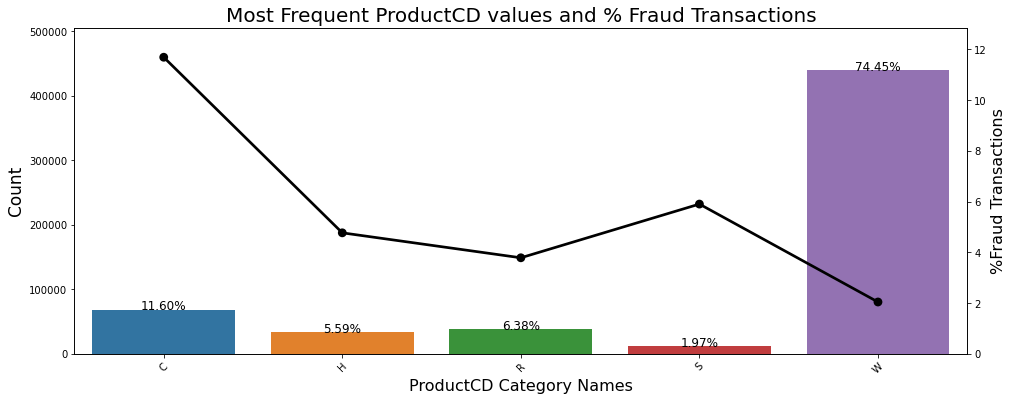

In [850]:
plot_counts_fraud(train, 'ProductCD')

This plot shows the counts for each class of the categorical feature ProductCD (indicated by the bars and the left axis, the percentage displayed is the percentage of total values that fall into a particular class). The plot also shows the percentage of fraud transactions that fall into each class (indicated by the black dots and the right axis). It appears that classes C, H, R, and S represent a disproportionate percentage of fraud cases.

### card1 - card6 (categorical)

card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.

In [851]:
from scipy import stats

In [852]:
summarytable(train[['card1', 'card2', 'card3', 'card4', 'card5', 'card6']])

Dataset Shape: (590540, 6)


Name   dtypes  Missing  Uniques First Value Second Value Third Value  \
0  card1    int64        0    13553       13926         2755        4663   
1  card2  float64     8933      500         NaN          404         490   
2  card3  float64     1565      114         150          150         150   
3  card4   object     1577        4    discover   mastercard        visa   
4  card5  float64     4259      119         142          102         166   
5  card6   object     1571        4      credit       credit       debit   

   Entropy  
0     9.97  
1     6.32  
2     0.68  
3     1.09  
4     2.66  
5     0.82

card1 and card2 have a lot of unique values. If these two features turn out to be good predictors this is a factor in favour of using a neural network. Neural networks often do a good job with categorical features that have on the order of 1000 levels. 

Because the card1, card2, card3 and card5 features are stored as numerical data types we will take a look at their quantiles.

In [491]:
print("Card Features Quantiles: ")
print(train[['card1', 'card2', 'card3', 'card5']].quantile([0.01, .025, .1, .25, .5, .75, .975, .99]))

Card Features Quantiles: 
         card1  card2  card3  card5
0.010   1338.0  100.0  144.0  102.0
0.025   1675.0  111.0  150.0  102.0
0.100   2803.0  111.0  150.0  126.0
0.250   6019.0  214.0  150.0  166.0
0.500   9678.0  361.0  150.0  226.0
0.750  14184.0  512.0  150.0  226.0
0.975  18018.0  583.0  185.0  226.0
0.990  18238.0  583.0  185.0  226.0


In [853]:
def plot_distribution(df, col):
    plt.figure(figsize=(14,5))

    plot = sns.distplot(train[train['isFraud'] == 1][col], label='Fraud')
    plot = sns.distplot(train[train['isFraud'] == 0][col], label='NoFraud')
    plot.legend()
    plot.set_title(f"{col} Values Distribution by Target", fontsize=20)
    plot.set_xlabel(f"{col} Values", fontsize=18)
    plot.set_ylabel("Probability", fontsize=18)

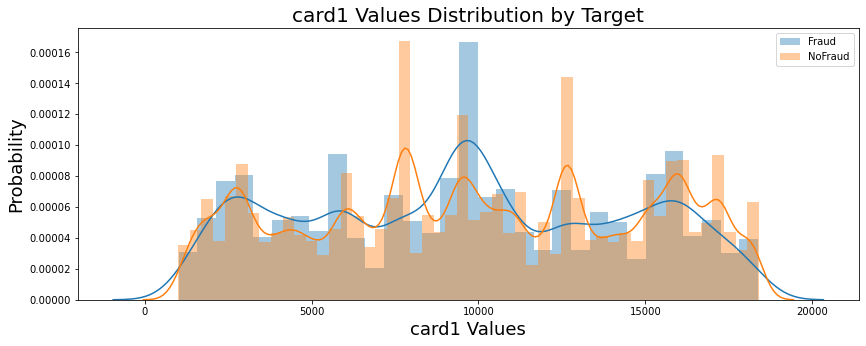

In [854]:
plot_distribution(train, 'card1')

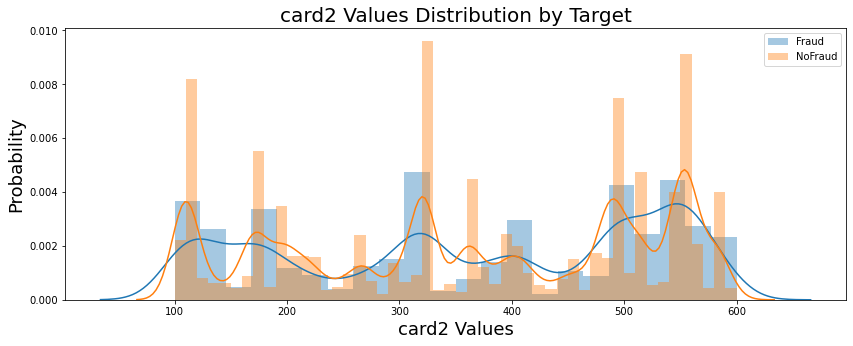

In [855]:
plot_distribution(train, 'card2')

Both of these distributions show differences with fraud status, it's too early to say if these differences will turn out to be predictive.

Moving forward, we will be collecting classes with low counts into a group labelled "Others" to make the plotting possible.

In [856]:
train.loc[train.card3.isin(train.card3.value_counts()[train.card3.value_counts() < 200].index), 'card3'] = "Others"
train.loc[train.card5.isin(train.card5.value_counts()[train.card5.value_counts() < 300].index), 'card5'] = "Others"

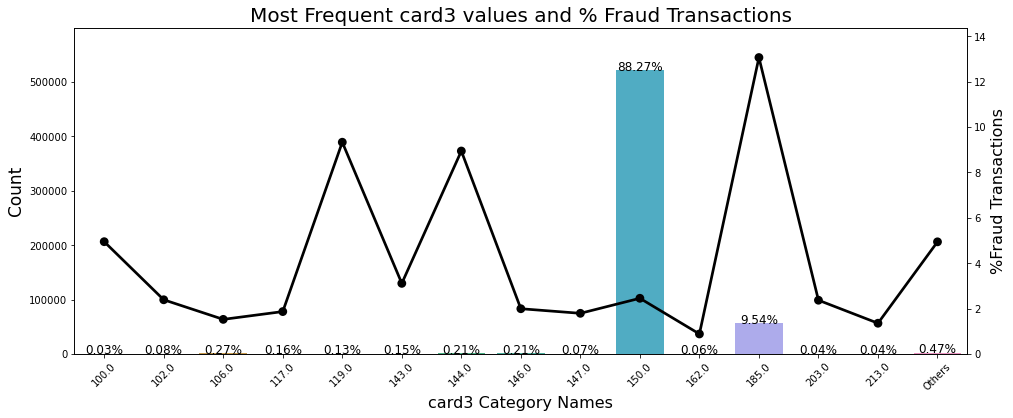

In [859]:
plot_counts_fraud(train, 'card3')

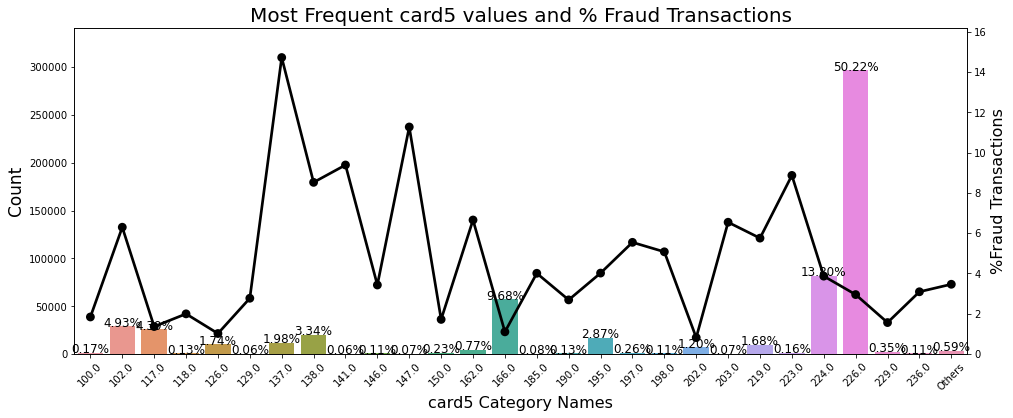

In [860]:
plot_counts_fraud(train, 'card5')

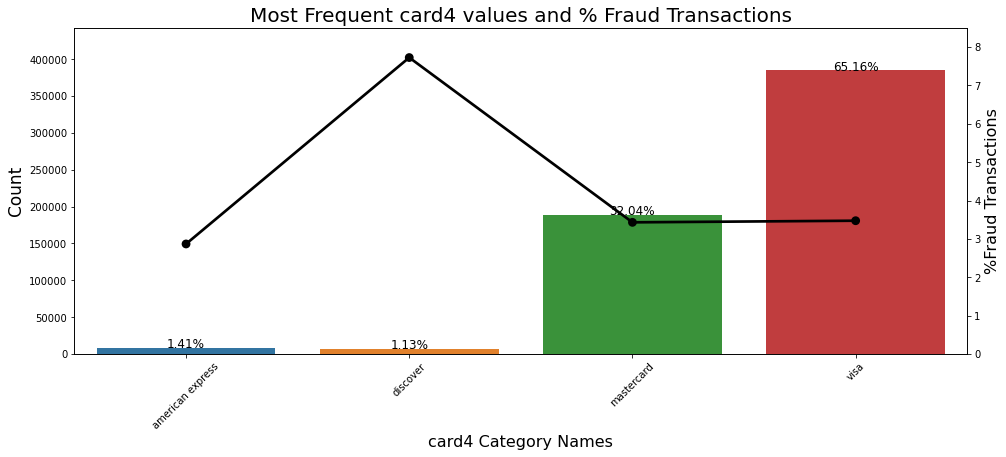

In [861]:
plot_counts_fraud(train, 'card4')

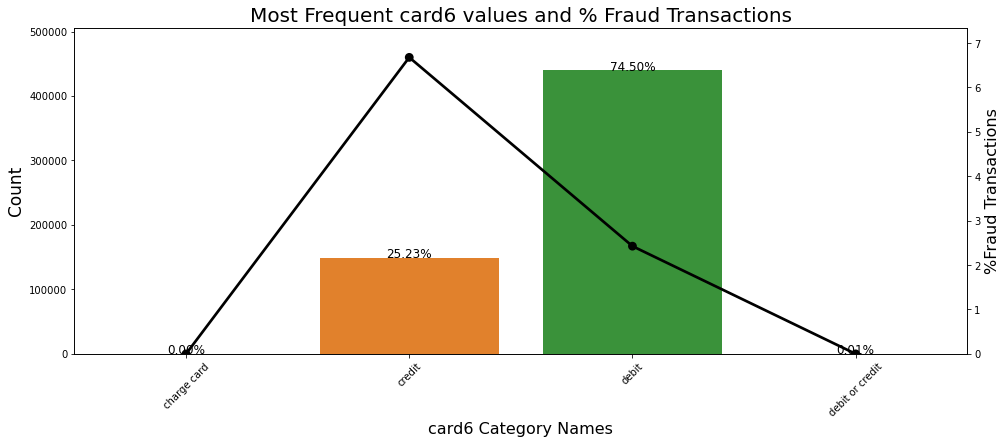

In [862]:
plot_counts(train, 'card6')

### TransactionDT, TransactionID, TransactionAmt (continuous)

TransactionDT: timedelta from a given reference datetime (not an actual timestamp)<br>
TransactionAMT: transaction payment amount in USD <br>
TransactionID: Unique transaction identifier

In [863]:
summarytable(train[['TransactionDT', 'TransactionID', 'TransactionAmt']])

Dataset Shape: (590540, 3)


Name   dtypes  Missing  Uniques  First Value  Second Value  \
0   TransactionDT    int64        0   573349      86400.0       86401.0   
1   TransactionID    int64        0   590540    2987000.0     2987001.0   
2  TransactionAmt  float64        0    20902         68.5          29.0   

   Third Value  Entropy  
0      86469.0    19.11  
1    2987002.0    19.17  
2         59.0     8.35

In [864]:
print("Training, Transaction Quantiles:")
print(train[['TransactionID', 'TransactionDT', 'TransactionAmt']]
      .quantile([.01, .025, .1, .25, .5, .75, .9, .975, .99]))
print("Test, Transaction Quantiles:")
print(test[['TransactionID', 'TransactionDT', 'TransactionAmt']]
      .quantile([.01, .025, .1, .25, .5, .75, .9, .975, .99]))

Training, Transaction Quantiles:
       TransactionID  TransactionDT  TransactionAmt
0.010    2992905.390      185058.82          9.2440
0.025    3001763.475      414800.70         14.5010
0.100    3046053.900     1361004.40         25.9500
0.250    3134634.750     3027057.75         43.3210
0.500    3282269.500     7306527.50         68.7690
0.750    3429904.250    11246620.00        125.0000
0.900    3518485.100    13990907.70        275.2930
0.975    3562775.525    15291965.35        648.3345
0.990    3571633.610    15629766.04       1104.0000
Test, Transaction Quantiles:
       TransactionID  TransactionDT  TransactionAmt
0.010     3668615.90    18573296.70           7.378
0.025     3676216.25    18814512.75          11.374
0.100     3714218.00    20106390.00          25.000
0.250     3790221.50    22771540.50          40.000
0.500     3916894.00    27204658.00          67.950
0.750     4043566.50    31348560.50         125.000
0.900     4119570.00    33232706.00         268.000
0.

The TransactionID and TransactioDT features are larger for the test set than for the training set, indicating that the test set is in the future with respect to the training set. Transaction amounts form a long tailed distribution that spans 3 orders of magnitude. When using this data with a neural network it may be a good idea to take the log of this feature. Random forrests, as ensembles of dicision tree classifiers, only care about the order of values (not differences) so taking the log shouldn't make a difference for those models.

Below is a useful analysis from one of the competition participants:


“TransactionDT first value is 86400, which corresponds to the number of seconds in a day (60 * 60 * 24 = 86400) so I think the unit is seconds. Using this, we know the data spans 6 months, as the maximum value is 15811131, which would correspond to day 183.”

In [865]:
START_DATE = '2017-12-01'
startdate = datetime.datetime.strptime(START_DATE, '%Y-%m-%d')
train['TransactionDT'] = train['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds = x)))
startdate = datetime.datetime.strptime(START_DATE, '%Y-%m-%d')
test['TransactionDT'] = test['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds = x)))

Text(0.5, 1.0, 'Distribution of transaction dates')

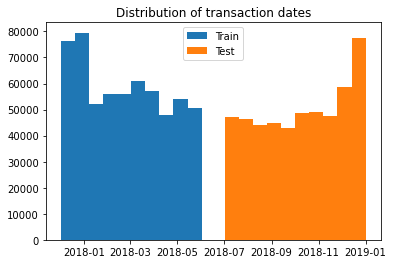

In [866]:
plt.hist(train['TransactionDT'], label='Train')
plt.hist(test['TransactionDT'], label='Test')
plt.legend()
plt.title('Distribution of transaction dates')

There is a peak in the number of transactions around christmas 2018 and christmas 2019.

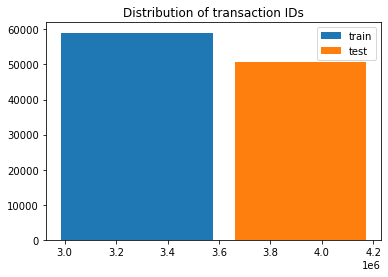

In [868]:
plt.hist(train['TransactionID'], label='train');
plt.hist(test['TransactionID'], label='test');
plt.legend();
plt.title('Distribution of transaction IDs');

Transaction IDs are evenly distributed in both the training and test sets, with the test set containing fewer IDs overall. This column will most likely be dropped, it seems to contain a distilled version of the same information that is contained in the TransactionDT column.

In [870]:
train['TransactionAmt'] = np.log(train['TransactionAmt'])
test['TransactionAmt'] = np.log(test['TransactionAmt'])

We take the log of the transactionAmt feature now because it allows us to make a plot that is easier to interperate.

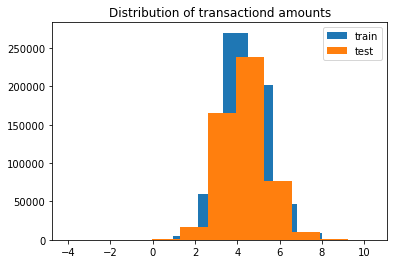

In [871]:
plt.hist(train['TransactionAmt'], label='train');
plt.hist(test['TransactionAmt'], label='test');
plt.legend();
plt.title('Distribution of transactiond amounts');

The transactionAmt distribution of the training data appears to reflect the distribution in the test data well. 

In [512]:
train.sort_values(by='isFraud', ascending=False).head()

TransactionID  isFraud       TransactionDT  TransactionAmt ProductCD  \
374988        3361988        1 2018-03-19 03:58:59        3.737693         C   
276475        3263475        1 2018-02-16 19:31:34        4.343805         W   
25277         3012277        1 2017-12-08 15:14:24        5.605802         W   
323050        3310050        1 2018-03-03 17:58:33        5.420535         W   
240281        3227281        1 2018-02-04 18:55:42        4.077537         W   

        card1  card2 card3       card4 card5   card6  addr1  addr2   dist1  \
374988   3901  176.0   185  mastercard   224  credit    NaN    NaN     NaN   
276475   7005  111.0   150        visa   226   debit  310.0   87.0  1089.0   
25277   18268  583.0   150        visa   226  credit  126.0   87.0     4.0   
323050  12544  321.0   150        visa   226   debit  325.0   87.0     NaN   
240281   1675  174.0   150        visa   226   debit  330.0   87.0     NaN   

        dist2 P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7  \
374988    NaN     gmail.com     gmail.com  1.0  1.0  0.0  1.0  0.0  1.0  1.0   
276475    NaN     gmail.com           NaN  2.0  6.0  0.0  0.0  0.0  1.0  0.0   
25277     NaN       aol.com           NaN  7.0  2.0  0.0  0.0  0.0  1.0  0.0   
323050    NaN     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
240281    NaN     yahoo.com           NaN  1.0  2.0  0.0  0.0  0.0  1.0  0.0   

         C8   C9  C10  C11  C12  C13  C14    D1    D2   D3     D4   D5   D6  \
374988  1.0  0.0  1.0  1.0  1.0  0.0  0.0   0.0   NaN  NaN    0.0  NaN  0.0   
276475  0.0  2.0  0.0  1.0  0.0  5.0  1.0  14.0  14.0  0.0    9.0  0.0  NaN   
25277   0.0  2.0  0.0  2.0  0.0  8.0  5.0   0.0   0.0  0.0  313.0  0.0  NaN   
323050  0.0  1.0  0.0  1.0  0.0  1.0  1.0   0.0   NaN  NaN    0.0  NaN  NaN   
240281  0.0  1.0  0.0  1.0  0.0  2.0  1.0  18.0  18.0  0.0    5.0  0.0  NaN   

        D7  D8  D9    D10    D11  D12  D13  D14    D15   M1   M2   M3  M4  \
374988 NaN NaN NaN    0.0    NaN  0.0  0.0  2.0    0.0  NaN  NaN  NaN  M2   
276475 NaN NaN NaN    0.0    0.0  NaN  NaN  NaN   14.0    T    T    F  M0   
25277  NaN NaN NaN  313.0  313.0  NaN  NaN  NaN  313.0    T    F    F  M0   
323050 NaN NaN NaN    0.0    0.0  NaN  NaN  NaN    0.0    T    T    T  M0   
240281 NaN NaN NaN   19.0    NaN  NaN  NaN  NaN   47.0  NaN  NaN  NaN  M0   

         M5   M6   M7   M8   M9   V1   V2   V3   V4   V5   V6   V7   V8   V9  \
374988  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
276475    F    F    F    F    F  1.0  1.0  1.0  1.0  1.0  2.0  2.0  1.0  1.0   
25277     F    F  NaN  NaN  NaN  1.0  1.0  1.0  1.0  1.0  1.0  2.0  1.0  1.0   
323050    F    T    F    F    T  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
240281    T    F  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

        V10  V11  V12  V13  V14  V15  V16  V17  V18  V19  V20  V21  V22  V23  \
374988  NaN  NaN  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
276475  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  2.0   
25277   0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0   
323050  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0   
240281  NaN  NaN  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   

        V24  V25  V26  V27  V28  V29  V30  V31  V32  V33  V34  V35  V36  V37  \
374988  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0   
276475  2.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0   
25277   2.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0   
323050  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0   
240281  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0   

        V38  V39  V40  V41  V42  V43  V44  V45  V46  V47  V48  V49  V50  V51  \
374988  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0   
276475  3.0  0.0  0.0  1.0  0.0  0.0

In [513]:
train.sort_values(by='isFraud', ascending=False).tail()

TransactionID  isFraud       TransactionDT  TransactionAmt ProductCD  \
199455        3186455        0 2018-01-22 07:29:18        3.159253         C   
199454        3186454        0 2018-01-22 07:18:16        4.879197         C   
199453        3186453        0 2018-01-22 07:10:31        3.582129         W   
199452        3186452        0 2018-01-22 07:00:37        4.718499         W   
590539        3577539        0 2018-06-01 23:58:51        5.634611         W   

        card1  card2 card3       card4 card5   card6  addr1  addr2  dist1  \
199455   3154  408.0   185  mastercard   224   debit    NaN    NaN    NaN   
199454  15885  545.0   185        visa   138   debit    NaN    NaN    NaN   
199453  15066  170.0   150  mastercard   102  credit  272.0   87.0  868.0   
199452  17649  507.0   150        visa   226  credit  330.0   87.0    0.0   
590539  15066  170.0   150  mastercard   102  credit  299.0   87.0    NaN   

        dist2  P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7  \
199455    1.0      gmail.com     gmail.com  1.0  1.0  0.0  1.0  0.0  1.0  1.0   
199454  358.0      gmail.com     gmail.com  1.0  1.0  0.0  1.0  0.0  1.0  1.0   
199453    NaN  anonymous.com           NaN  4.0  3.0  0.0  0.0  4.0  3.0  0.0   
199452    NaN      gmail.com           NaN  2.0  2.0  0.0  0.0  0.0  4.0  0.0   
590539    NaN      gmail.com           NaN  2.0  1.0  0.0  0.0  1.0  1.0  0.0   

         C8   C9  C10  C11  C12  C13  C14    D1    D2   D3    D4   D5   D6  \
199455  1.0  0.0  1.0  1.0  1.0  1.0  1.0   0.0   NaN  NaN   0.0  NaN  0.0   
199454  1.0  0.0  1.0  1.0  1.0  1.0  1.0   0.0   NaN  NaN   0.0  NaN  0.0   
199453  0.0  3.0  0.0  2.0  0.0  8.0  4.0   6.0   6.0  6.0  29.0  6.0  NaN   
199452  0.0  1.0  0.0  1.0  0.0  9.0  2.0  53.0  53.0  0.0  53.0  0.0  NaN   
590539  0.0  2.0  0.0  1.0  0.0  1.0  1.0   0.0   NaN  0.0   1.0  0.0  NaN   

        D7         D8        D9    D10   D11  D12  D13  D14    D15   M1   M2  \
199455 NaN  21.291666  0.291666    0.0   NaN  0.0  0.0  0.0    0.0  NaN  NaN   
199454 NaN   8.291666  0.291666    0.0   NaN  0.0  0.0  0.0    0.0  NaN  NaN   
199453 NaN        NaN       NaN   29.0  29.0  NaN  NaN  NaN   36.0    T    T   
199452 NaN        NaN       NaN  343.0  35.0  NaN  NaN  NaN  343.0    T    T   
590539 NaN        NaN       NaN    1.0   0.0  NaN  NaN  NaN    1.0    T    F   

         M3   M4   M5   M6   M7   M8   M9   V1   V2   V3   V4   V5   V6   V7  \
199455  NaN   M2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
199454  NaN   M2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
199453    T  NaN  NaN    T    F    F    F  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
199452    T   M1    F    F    T    T    T  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
590539    F  NaN  NaN    T    F    F    F  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

         V8   V9  V10  V11  V12  V13  V14  V15  V16  V17  V18  V19  V20  V21  \
199455  NaN  NaN  NaN  NaN  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
199454  NaN  NaN  NaN  NaN  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
199453  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   
199452  1.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   
590539  1.0  1.0  1.0  1.0  2.0  2.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   

        V22  V23  V24  V25  V26  V27  V28  V29  V30  V31  V32  V33  V34  V35  \
199455  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0   
199454  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0   
199453  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0   
199452  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
590539  0.0  2.0  2.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  2.0   

        V36  V37  V38  V39  V40  V41  V42  V43  V44  V45  V46  V47  V48  V49  \
199455  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0   
199454  0.0  1.0  1.0  1

### addr1, addr2 (categorical)

In [514]:
resumetable(train[['addr1', 'addr2']])

Dataset Shape: (590540, 2)


Name   dtypes  Missing  Uniques  First Value  Second Value  Third Value  \
0  addr1  float64    65706      332        315.0         325.0        330.0   
1  addr2  float64    65706       74         87.0          87.0         87.0   

   Entropy  
0     5.06  
1     0.08

In [515]:
print("addr Features Quantiles: ")
print(train[['addr1', 'addr2']].quantile([0.01, .025, .1, .25, .5, .75, .975, .99]))

addr Features Quantiles: 
       addr1  addr2
0.010  123.0   87.0
0.025  123.0   87.0
0.100  177.0   87.0
0.250  204.0   87.0
0.500  299.0   87.0
0.750  330.0   87.0
0.975  498.0   87.0
0.990  512.0   87.0


In [522]:
def plot_cat_counts_and_percent_fraud(df, col):   
    total = len(train)
    total_amt = train.groupby(['isFraud'])['TransactionAmt'].sum().sum()
   
    tmp = pd.crosstab(df[col], df['isFraud'], normalize='index') * 100
    tmp = tmp.reset_index()
    tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)
    plt.figure(figsize=(16,14))    
    plt.suptitle( f'{col} Distributions ', fontsize=24)

    plt.subplot(211)
    plot = sns.countplot(x=col, data=df, order=list(tmp[col].values))
    plot_t = plot.twinx()
    plot_t = sns.pointplot(x=col, y='Fraud', data=tmp, order=list(tmp[col].values),
                           color='black', legend=False)
    plot_t.set_ylim(0,tmp['Fraud'].max()*1.1)
    plot_t.set_ylabel("%Fraud Transactions", fontsize=16)
    plot.set_title(f"Most Frequent {col} values and % Fraud Transactions", fontsize=20)
    plot.set_xlabel(f"{col} Category Names", fontsize=16)
    plot.set_ylabel("Count", fontsize=17)
    plot.set_xticklabels(plot.get_xticklabels(),rotation=45)
    sizes = []
    for p in plot.patches:
        height = p.get_height()
        sizes.append(height)
        plot.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center",fontsize=12) 
        
    plot.set_ylim(0,max(sizes)*1.15)
    
    perc_amt = (df.groupby(['isFraud',col])['TransactionAmt'].sum() \
                / df.groupby([col])['TransactionAmt'].sum() * 100).unstack('isFraud')
    perc_amt = perc_amt.reset_index()
    perc_amt.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)
    amt = df.groupby([col])['TransactionAmt'].sum().reset_index()
    perc_amt = perc_amt.fillna(0)
    
    plt.subplot(212)
    plot1 = sns.barplot(x=col, y='TransactionAmt', 
                       data=amt, 
                       order=list(tmp[col].values))
    plot1_t = plot1.twinx()
    plot1_t = sns.pointplot(x=col, y='Fraud', data=perc_amt, 
                        order=list(tmp[col].values),
                       color='black', legend=False, )
    plot1_t.set_ylim(0,perc_amt['Fraud'].max()*1.1)
    plot1_t.set_ylabel("%Fraud Total Amount", fontsize=16)
    plot1.set_xticklabels(plot1.get_xticklabels(),rotation=45)
    plot1.set_title(f"{col} by Transactions Total + %of total and %Fraud Transactions", fontsize=20)
    plot1.set_xlabel(f"{col} Category Names", fontsize=16)
    plot1.set_ylabel("Transaction Total Amount(U$)", fontsize=16)
    
    for p in plot1.patches:
        height = p.get_height()
        plot1.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total_amt*100),
                ha="center",fontsize=12) 
        
    plt.subplots_adjust(hspace=.4, top = 0.9)
    plt.show()
    

In [523]:
train.loc[train.addr1.isin(train.addr1.value_counts()[train.addr1.value_counts() <= 5000 ].index), 'addr1'] = "Others"
train.loc[train.addr2.isin(train.addr2.value_counts()[train.addr2.value_counts() <= 50 ].index), 'addr2'] = "Others"

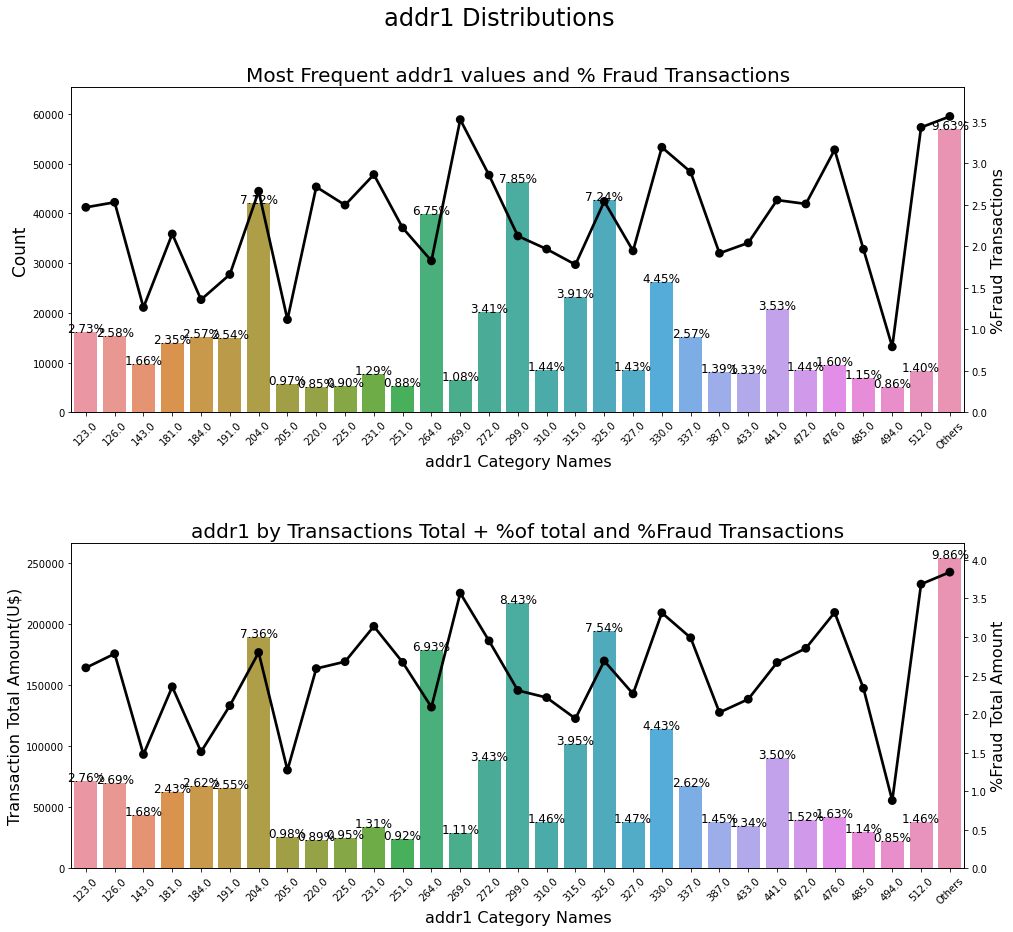

In [524]:
plot_cat_counts_and_percent_fraud(train, 'addr1')

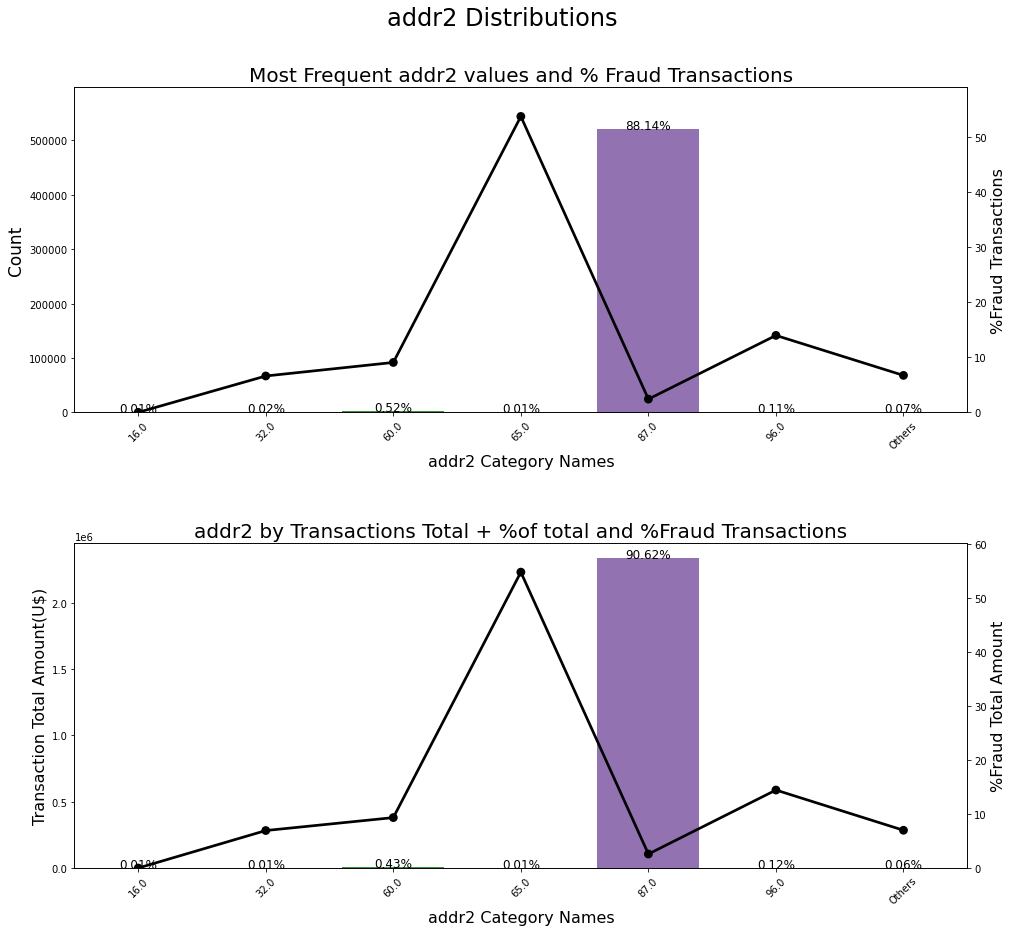

In [525]:
plot_cat_counts_and_percent_fraud(train, 'addr2')

### dist1, dist2 (continuous)

In [526]:
resumetable(train[['dist1', 'dist2']])

Dataset Shape: (590540, 2)


Name   dtypes  Missing  Uniques  First Value  Second Value  Third Value  \
0  dist1  float64   352271     2651         19.0           NaN        287.0   
1  dist2  float64   552913     1751          NaN           NaN          NaN   

   Entropy  
0     6.34  
1     7.42

In [527]:
print("dist Features Quantiles: ")
print(train[['dist1', 'dist2']].quantile([0.01, .025, .1, .25, .5, .75, .975, .99]))

dist Features Quantiles: 
        dist1    dist2
0.010     0.0     0.00
0.025     0.0     0.00
0.100     1.0     1.00
0.250     3.0     7.00
0.500     8.0    37.00
0.750    24.0   206.00
0.975  1284.0  1839.00
0.990  2040.0  2367.48


In [530]:
train['dist1'] = np.log(train['dist1'] + 1)
train['dist2'] = np.log(train['dist2'] + 1)

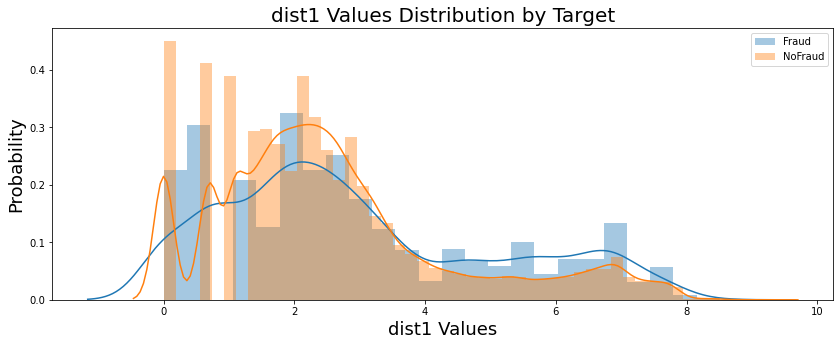

In [531]:
plot_distribution(train, 'dist1')

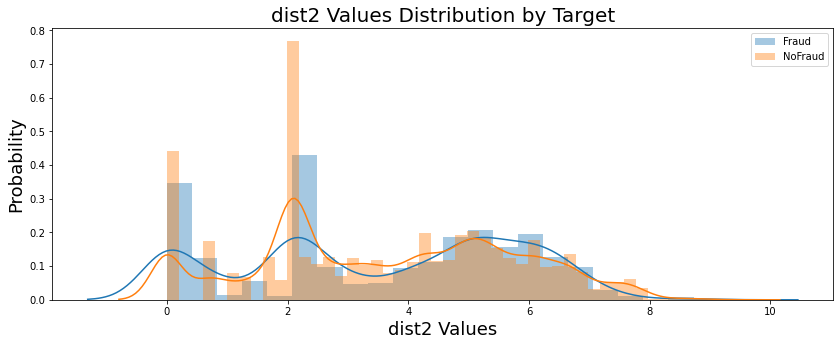

In [532]:
plot_distribution(train, 'dist2')

### P_emaildomain,  R_emaildomain (categorical)

In [533]:
resumetable(train[['P_emaildomain', 'R_emaildomain']])

Dataset Shape: (590540, 2)


Name  dtypes  Missing  Uniques First Value Second Value  \
0  P_emaildomain  object    94456       59         NaN    gmail.com   
1  R_emaildomain  object   453249       60         NaN          NaN   

   Third Value  Entropy  
0  outlook.com     2.68  
1          NaN     2.76

In [534]:
train.loc[train['P_emaildomain'].isin(['gmail.com', 'gmail']),'P_emaildomain'] = 'Google'

train.loc[train['P_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx',  'yahoo.co.uk',
                                             'yahoo.co.jp', 'yahoo.de', 'yahoo.fr',
                                             'yahoo.es']), 'P_emaildomain'] = 'Yahoo Mail'
train.loc[train['P_emaildomain'].isin(['hotmail.com','outlook.com','msn.com', 'live.com.mx', 
                                             'hotmail.es','hotmail.co.uk', 'hotmail.de',
                                             'outlook.es', 'live.com', 'live.fr',
                                             'hotmail.fr']), 'P_emaildomain'] = 'Microsoft'
train.loc[train.P_emaildomain.isin(train.P_emaildomain\
                                         .value_counts()[train.P_emaildomain.value_counts() <= 500 ]\
                                         .index), 'P_emaildomain'] = "Others"

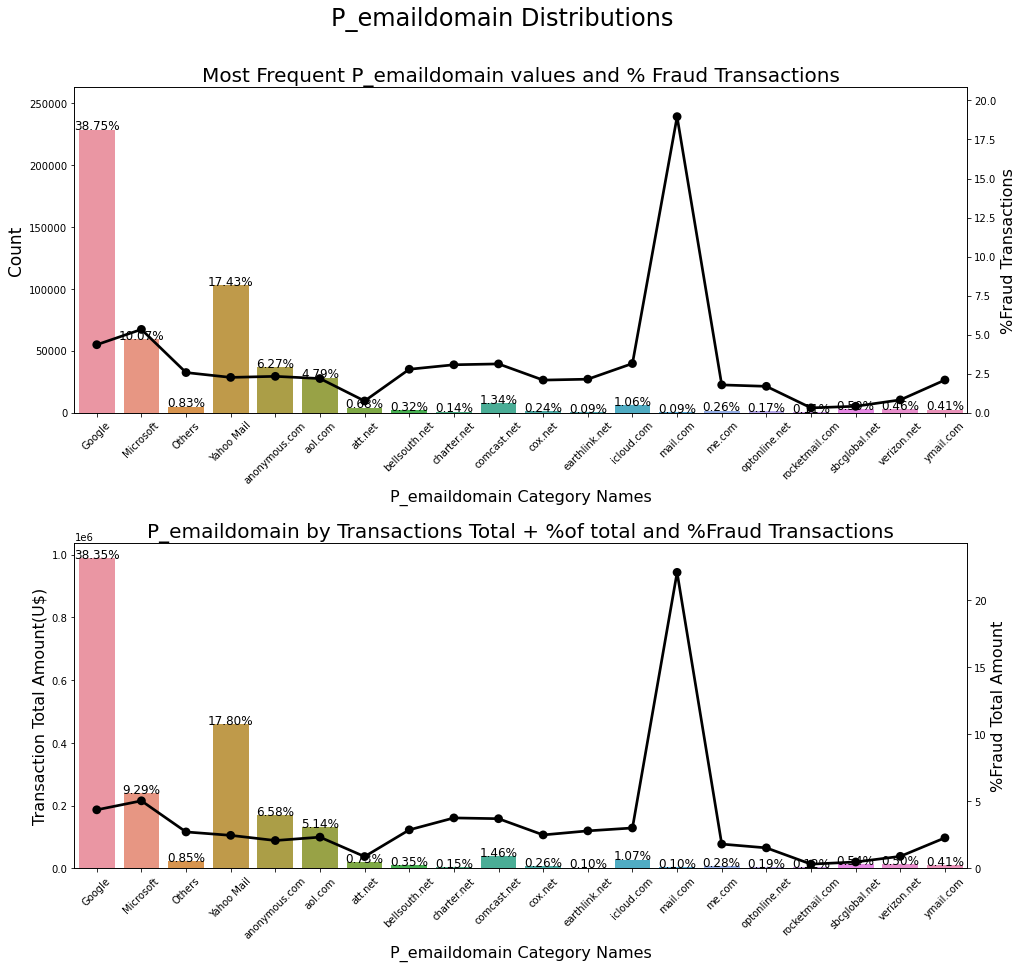

In [535]:
plot_cat_counts_and_percent_fraud(train, 'P_emaildomain')

In [536]:
train.loc[train['R_emaildomain'].isin(['gmail.com', 'gmail']),'R_emaildomain'] = 'Google'

train.loc[train['R_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx',  'yahoo.co.uk',
                                             'yahoo.co.jp', 'yahoo.de', 'yahoo.fr',
                                             'yahoo.es']), 'R_emaildomain'] = 'Yahoo Mail'
train.loc[train['R_emaildomain'].isin(['hotmail.com','outlook.com','msn.com', 'live.com.mx', 
                                             'hotmail.es','hotmail.co.uk', 'hotmail.de',
                                             'outlook.es', 'live.com', 'live.fr',
                                             'hotmail.fr']), 'R_emaildomain'] = 'Microsoft'
train.loc[train.R_emaildomain.isin(train.R_emaildomain\
                                         .value_counts()[train.R_emaildomain.value_counts() <= 300 ]\
                                         .index), 'R_emaildomain'] = "Others"

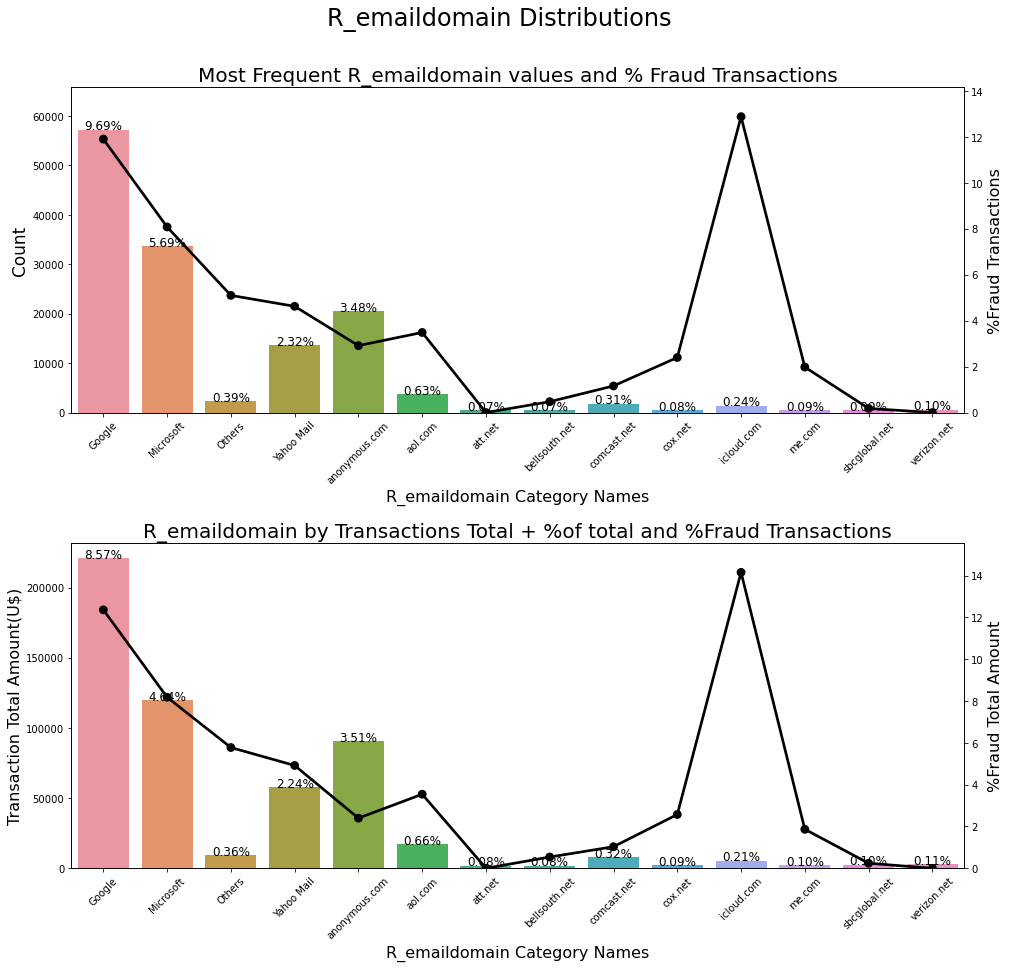

In [537]:
plot_cat_counts_and_percent_fraud(train, 'R_emaildomain')

### C1 - C14 (continuous)

In [538]:
resumetable(train[['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8',
                   'C9', 'C10', 'C11', 'C12', 'C13', 'C14']])

Dataset Shape: (590540, 14)


Name   dtypes  Missing  Uniques  First Value  Second Value  Third Value  \
0    C1  float64        0     1657          1.0           1.0          1.0   
1    C2  float64        0     1216          1.0           1.0          1.0   
2    C3  float64        0       27          0.0           0.0          0.0   
3    C4  float64        0     1260          0.0           0.0          0.0   
4    C5  float64        0      319          0.0           0.0          0.0   
5    C6  float64        0     1328          1.0           1.0          1.0   
6    C7  float64        0     1103          0.0           0.0          0.0   
7    C8  float64        0     1253          0.0           0.0          0.0   
8    C9  float64        0      205          1.0           0.0          1.0   
9   C10  float64        0     1231          0.0           0.0          0.0   
10  C11  float64        0     1476          2.0           1.0          1.0   
11  C12  float64        0     1199          0.0           0.0          0.0   
12  C13  float64        0     1597          1.0           1.0          1.0   
13  C14  float64        0     1108          1.0           1.0          1.0   

    Entropy  
0      2.72  
1      2.75  
2      0.04  
3      1.12  
4      2.06  
5      2.52  
6      0.71  
7      1.25  
8      2.62  
9      1.23  
10     2.17  
11     0.95  
12     4.66  
13     2.67

In [541]:
print("Train, dist Features Quantiles: ")
print(train[['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8',
                   'C9', 'C10', 'C11', 'C12', 'C13', 'C14']].quantile([0.01, .025, .1, .25, .5, .75, .975, .99]))
print("Test, dist Features Quantiles: ")
print(test[['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8',
                   'C9', 'C10', 'C11', 'C12', 'C13', 'C14']].quantile([0.01, .025, .1, .25, .5, .75, .975, .99]))

Trains, dist Features Quantiles: 
          C1     C2   C3   C4     C5     C6   C7    C8    C9   C10    C11  \
0.010    1.0    1.0  0.0  0.0    0.0    0.0  0.0   0.0   0.0   0.0    1.0   
0.025    1.0    1.0  0.0  0.0    0.0    0.0  0.0   0.0   0.0   0.0    1.0   
0.100    1.0    1.0  0.0  0.0    0.0    1.0  0.0   0.0   0.0   0.0    1.0   
0.250    1.0    1.0  0.0  0.0    0.0    1.0  0.0   0.0   0.0   0.0    1.0   
0.500    1.0    1.0  0.0  0.0    0.0    1.0  0.0   0.0   1.0   0.0    1.0   
0.750    3.0    3.0  0.0  0.0    1.0    2.0  0.0   0.0   2.0   0.0    2.0   
0.975  121.0  111.0  0.0  2.0  106.0   86.0  2.0   4.0  71.0   4.0   85.0   
0.990  164.0  154.0  0.0  6.0  149.0  118.0  4.0  11.0  95.0  15.0  122.0   

       C12    C13    C14  
0.010  0.0    0.0    0.0  
0.025  0.0    0.0    0.0  
0.100  0.0    1.0    1.0  
0.250  0.0    1.0    1.0  
0.500  0.0    3.0    1.0  
0.750  0.0   12.0    2.0  
0.975  2.0  464.0   97.0  
0.990  5.0  578.0  128.0  
Test, dist Features Quantiles

In [546]:
train['C1']

0         1.0
1         1.0
2         1.0
3         2.0
4         1.0
         ... 
590535    2.0
590536    1.0
590537    1.0
590538    1.0
590539    2.0
Name: C1, Length: 590540, dtype: float64

In [549]:
train.loc[train.C1.isin(train.C1\
                              .value_counts()[train.C1.value_counts() <= 400 ]\
                              .index), 'C1'] = "Others"

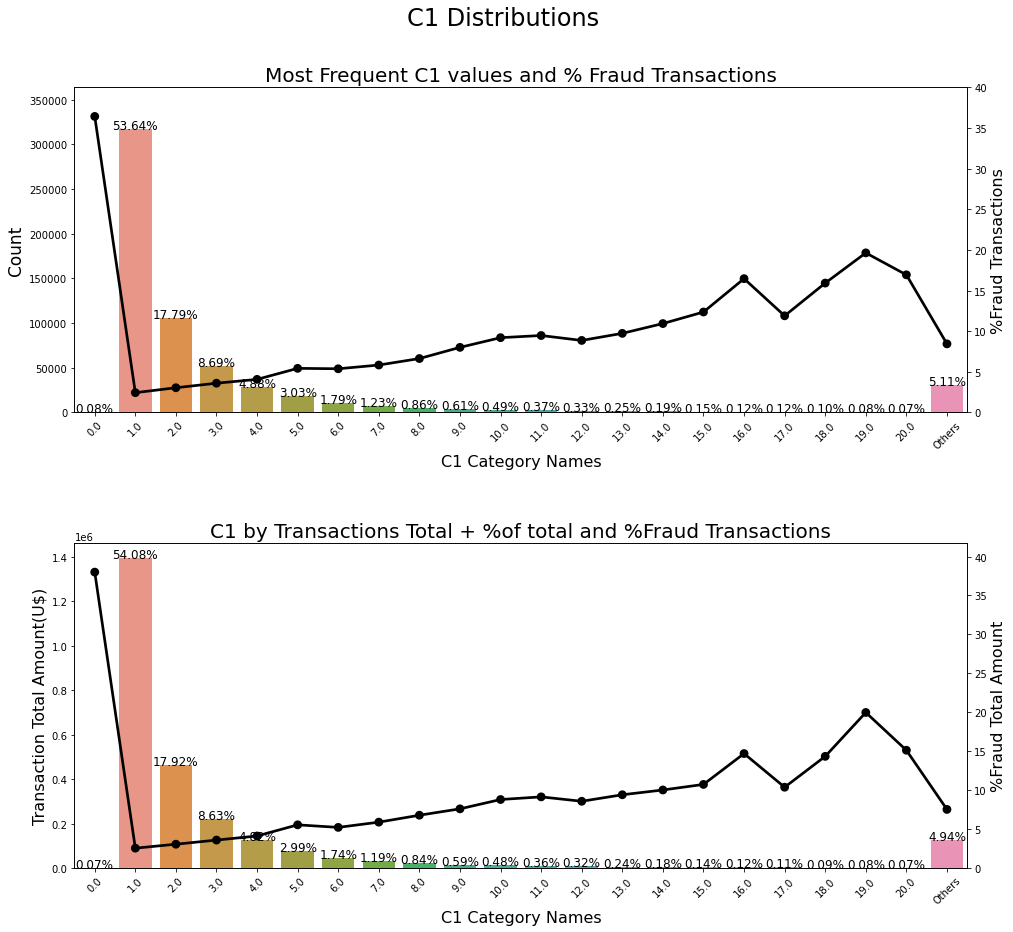

In [550]:
plot_cat_counts_and_percent_fraud(train, 'C1')

In [552]:
train.loc[train.C2.isin(train.C2\
                              .value_counts()[train.C2.value_counts() <= 350 ]\
                              .index), 'C2'] = "Others"

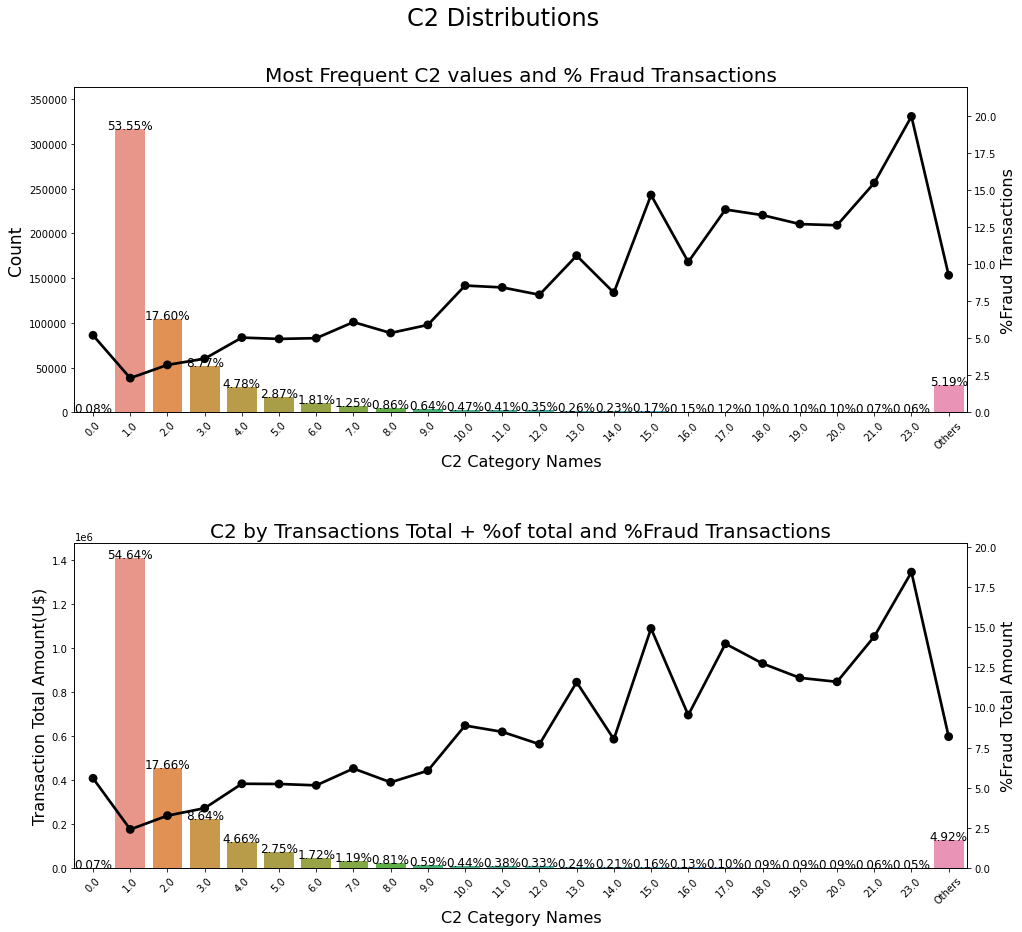

In [553]:
plot_cat_counts_and_percent_fraud(train, 'C2')

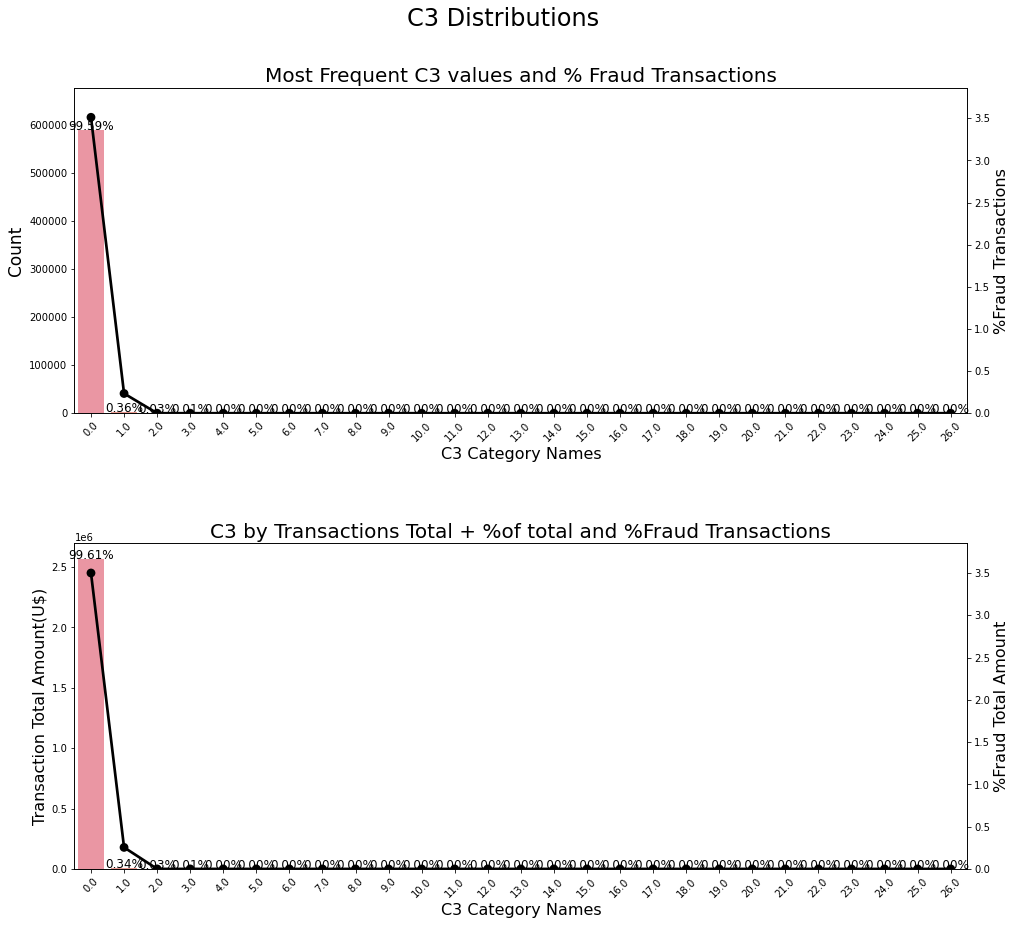

In [554]:
plot_cat_counts_and_percent_fraud(train, 'C3')

In [580]:
train = pd.read_csv(path/'train.csv', index_col=[0], low_memory=False)

In [581]:
train.loc[train.C2.isin(train.C2\
                              .value_counts()[train.C2.value_counts() <= 10000 ]\
                              .index), 'C4'] = "Others"

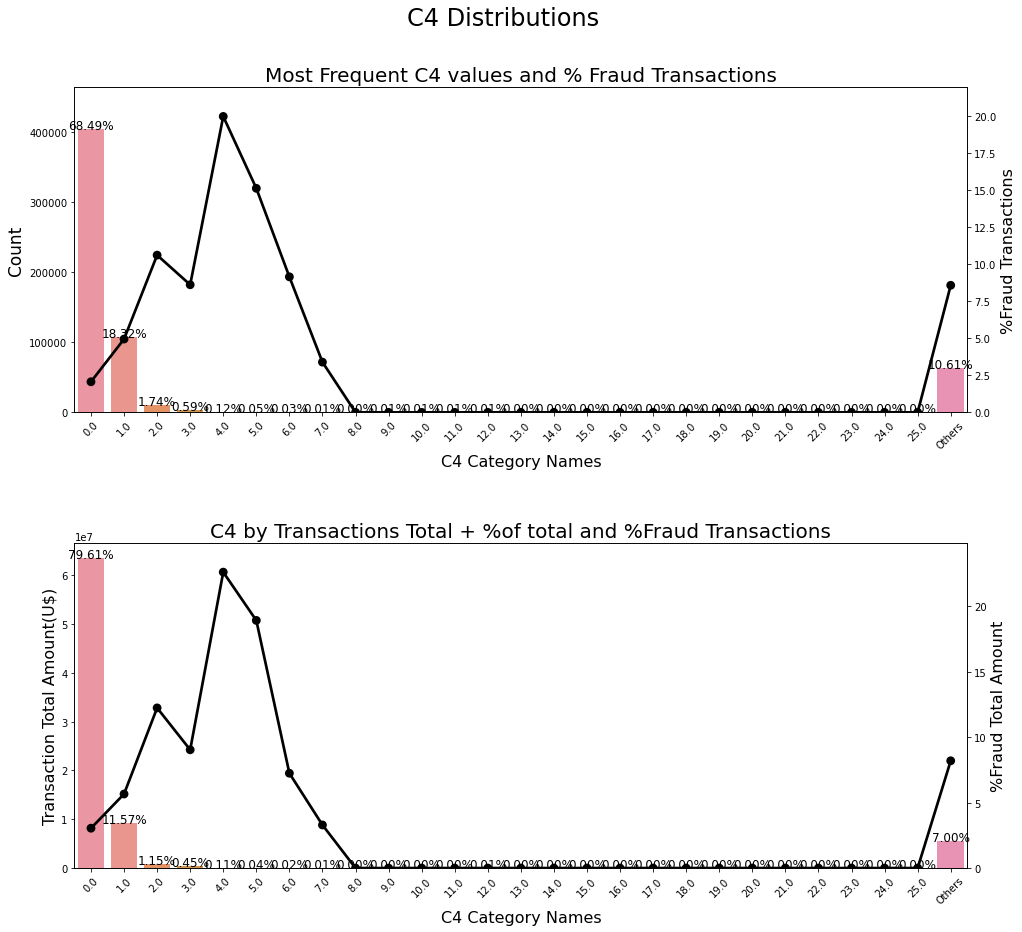

In [582]:
plot_cat_counts_and_percent_fraud(train, 'C4')

In [586]:
train.loc[train.C2.isin(train.C2\
                              .value_counts()[train.C2.value_counts() <= 10000 ]\
                              .index), 'C5'] = "Others"

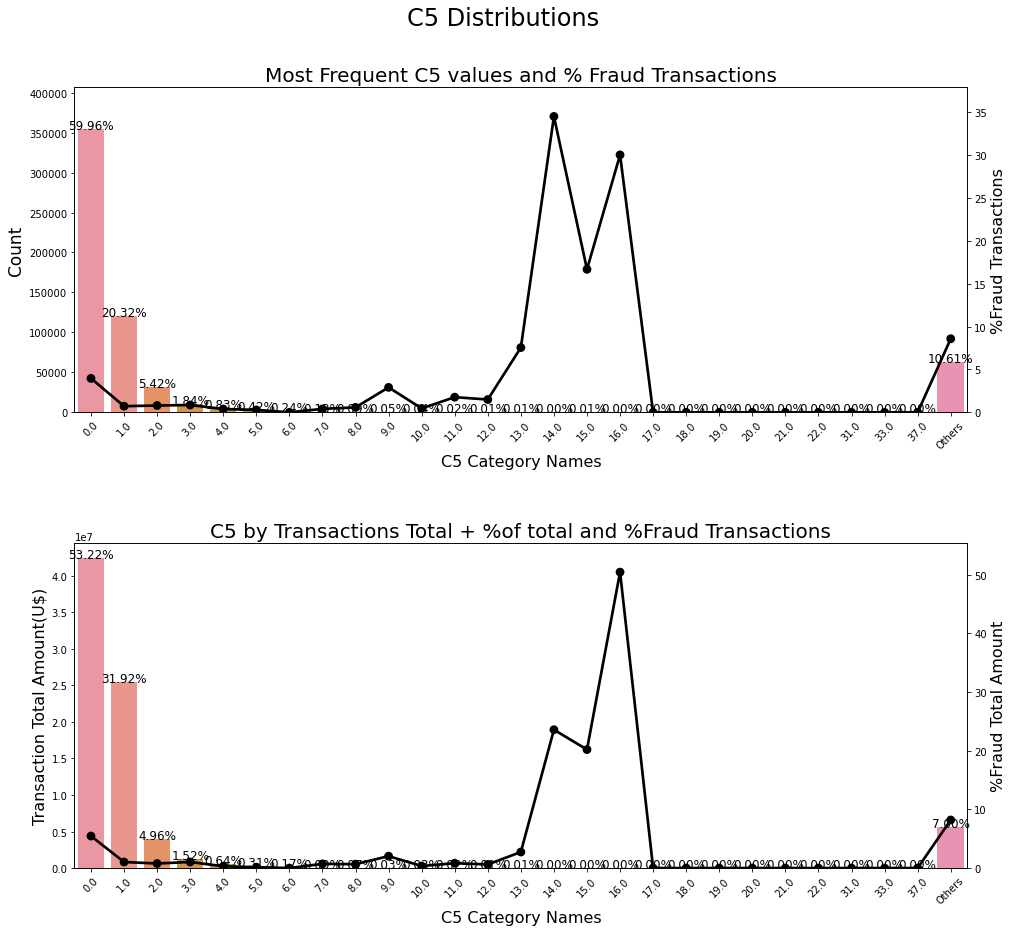

In [587]:
plot_cat_counts_and_percent_fraud(train, 'C5')

In [591]:
train.loc[train.C2.isin(train.C2\
                              .value_counts()[train.C2.value_counts() <= 10000 ]\
                              .index), 'C6'] = "Others"

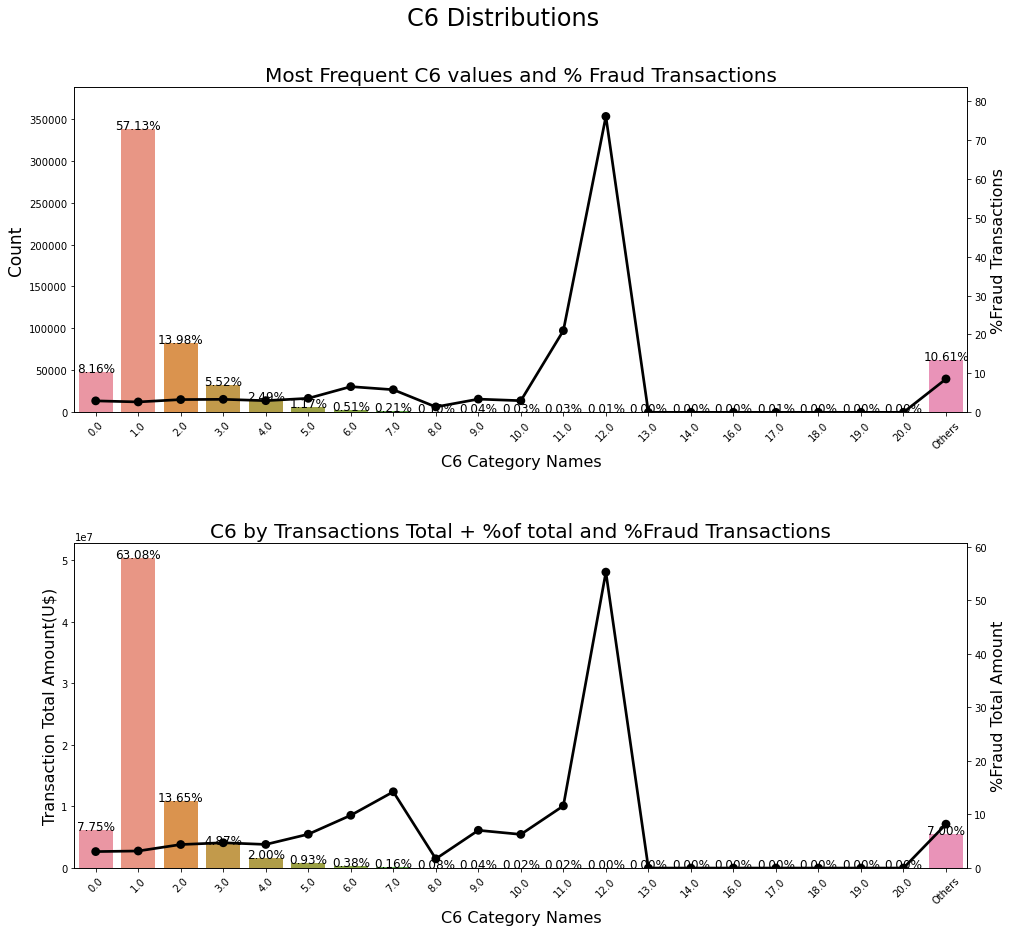

In [589]:
plot_cat_counts_and_percent_fraud(train, 'C6')

In [603]:
train = pd.read_csv(path/'train.csv', index_col=[0], low_memory=False)

In [604]:
train.loc[train.C2.isin(train.C2\
                              .value_counts()[train.C2.value_counts() <= 300 ]\
                              .index), 'C7'] = "Others"

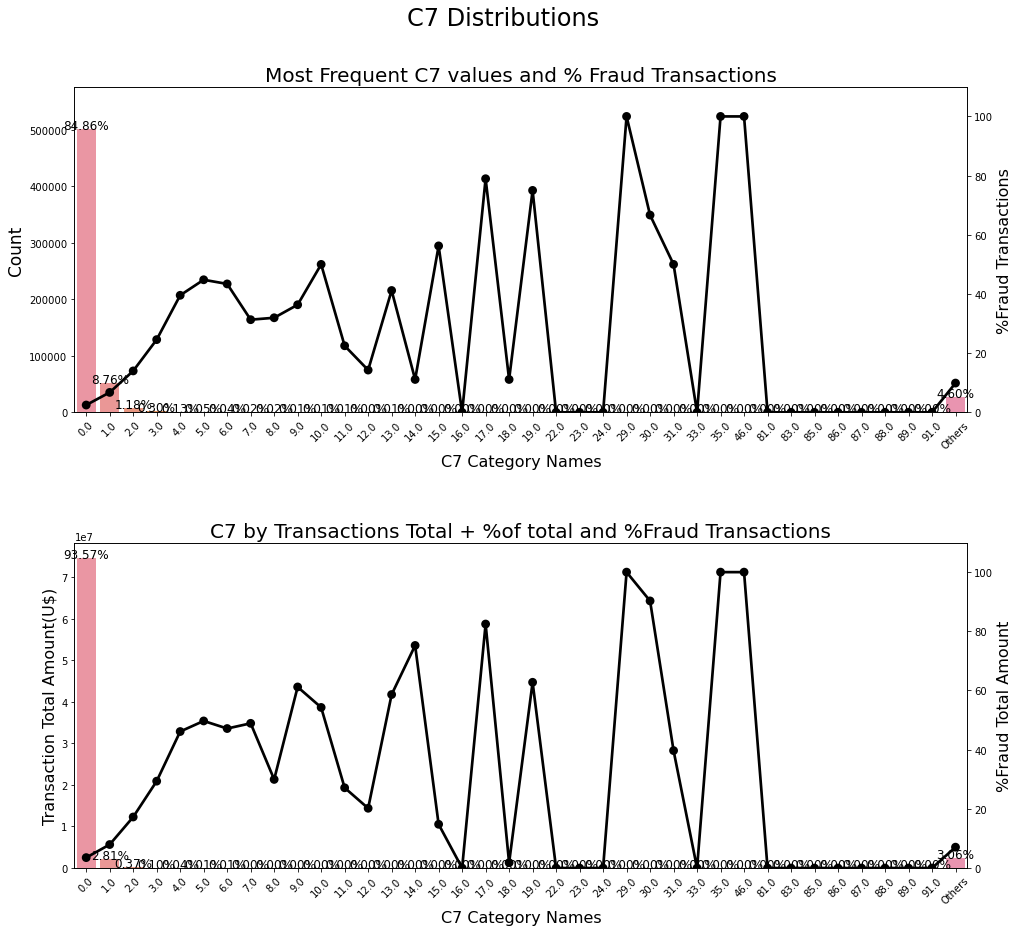

In [605]:
plot_cat_counts_and_percent_fraud(train, 'C7')

In [607]:
train.loc[train.C2.isin(train.C2\
                              .value_counts()[train.C2.value_counts() <= 10000 ]\
                              .index), 'C8'] = "Others"

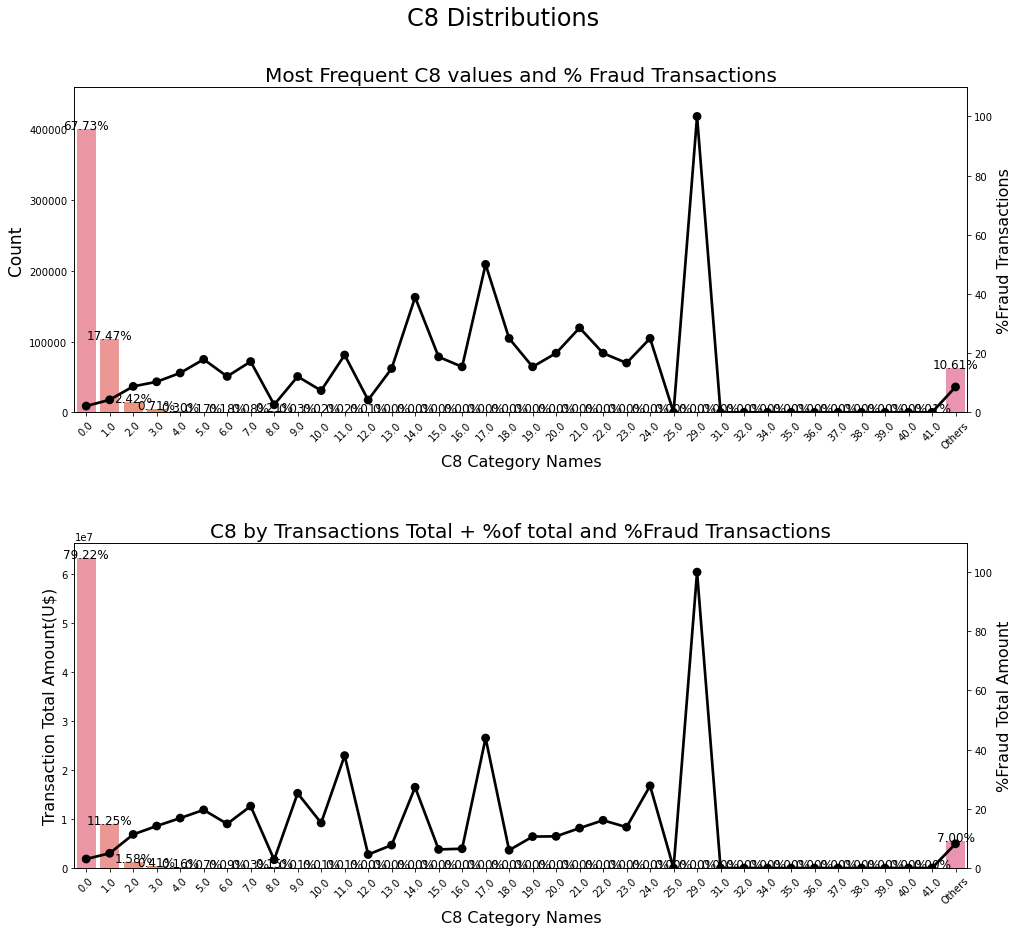

In [608]:
plot_cat_counts_and_percent_fraud(train, 'C8')

In [611]:
train = pd.read_csv(path/'train.csv', index_col=[0], low_memory=False)

In [612]:
train.loc[train.C2.isin(train.C2\
                              .value_counts()[train.C2.value_counts() <= 1000 ]\
                              .index), 'C9'] = "Others"

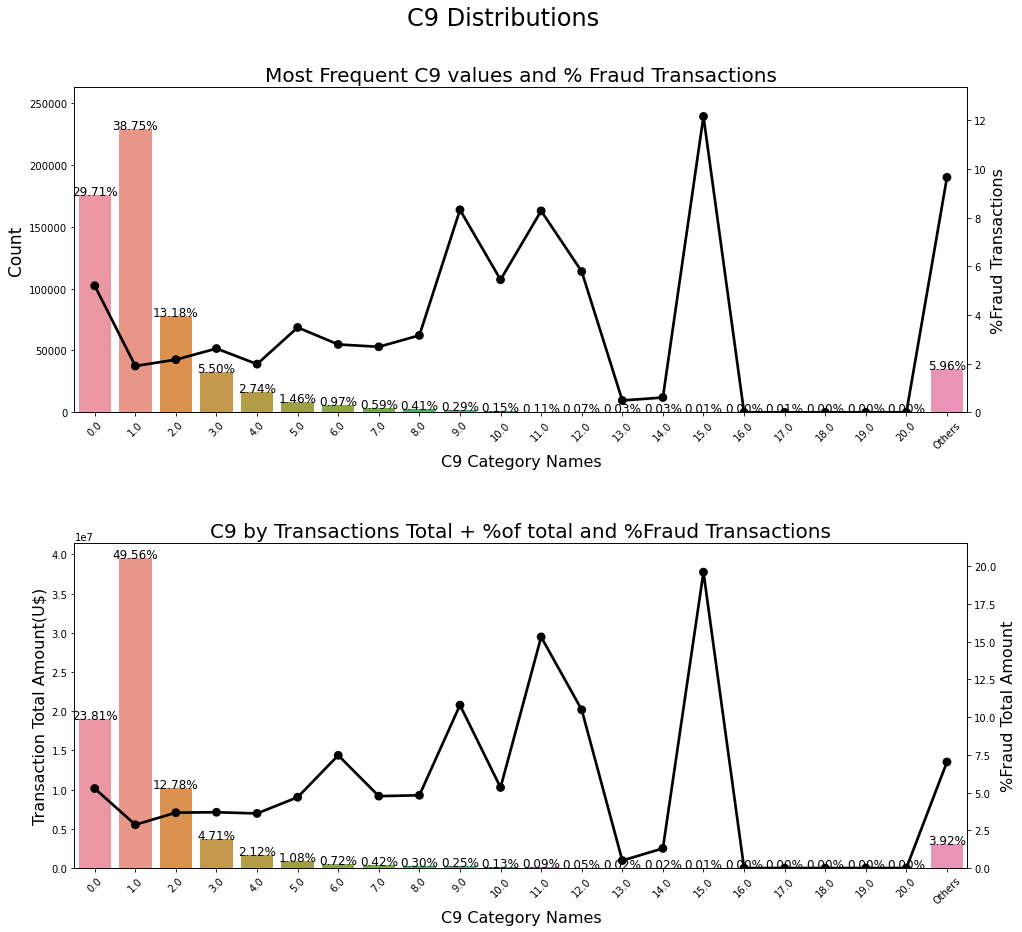

In [613]:
plot_cat_counts_and_percent_fraud(train, 'C9')

In [626]:
train = pd.read_csv(path/'train.csv', index_col=[0], low_memory=False)

In [627]:
train.loc[train.C2.isin(train.C2\
                              .value_counts()[train.C2.value_counts() <= 200000 ]\
                              .index), 'C10'] = "Others"

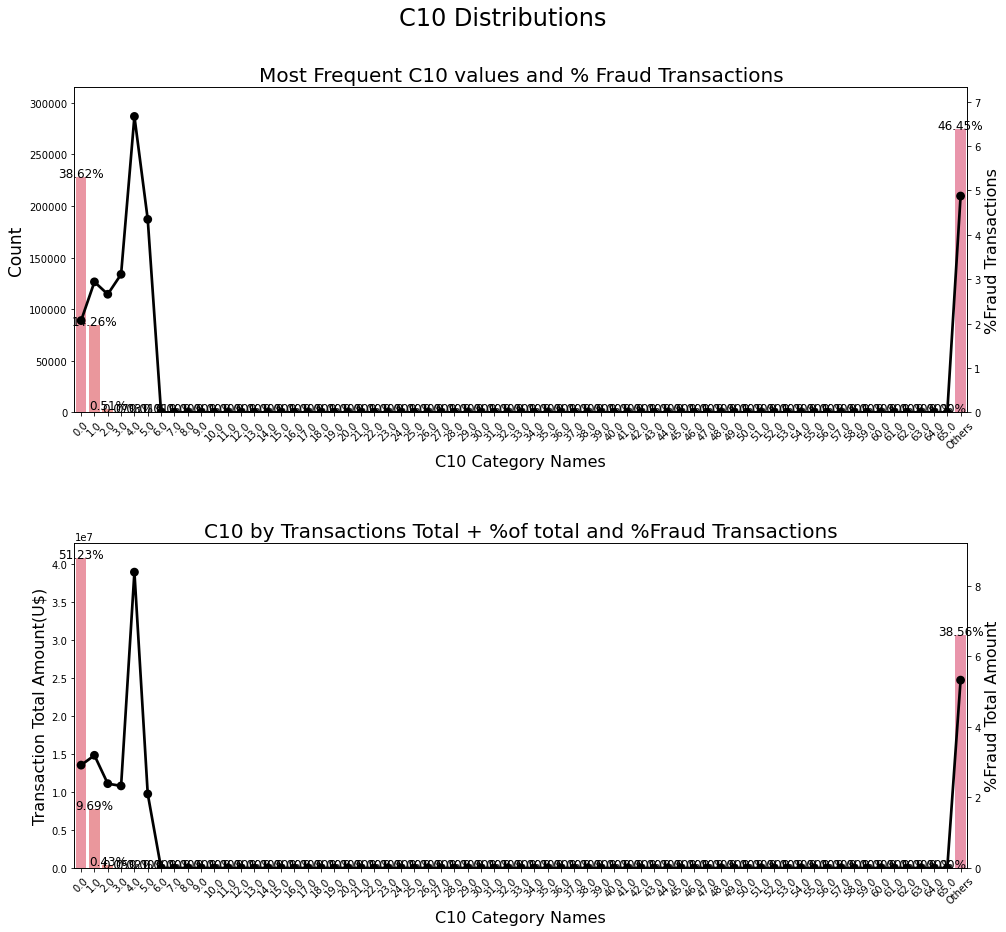

In [628]:
plot_cat_counts_and_percent_fraud(train, 'C10')

In [ ]:
train = pd.read_csv(path/'train.csv', index_col=[0], low_memory=False)

In [632]:
train.loc[train.C2.isin(train.C2\
                              .value_counts()[train.C2.value_counts() <= 10000 ]\
                              .index), 'C11'] = "Others"

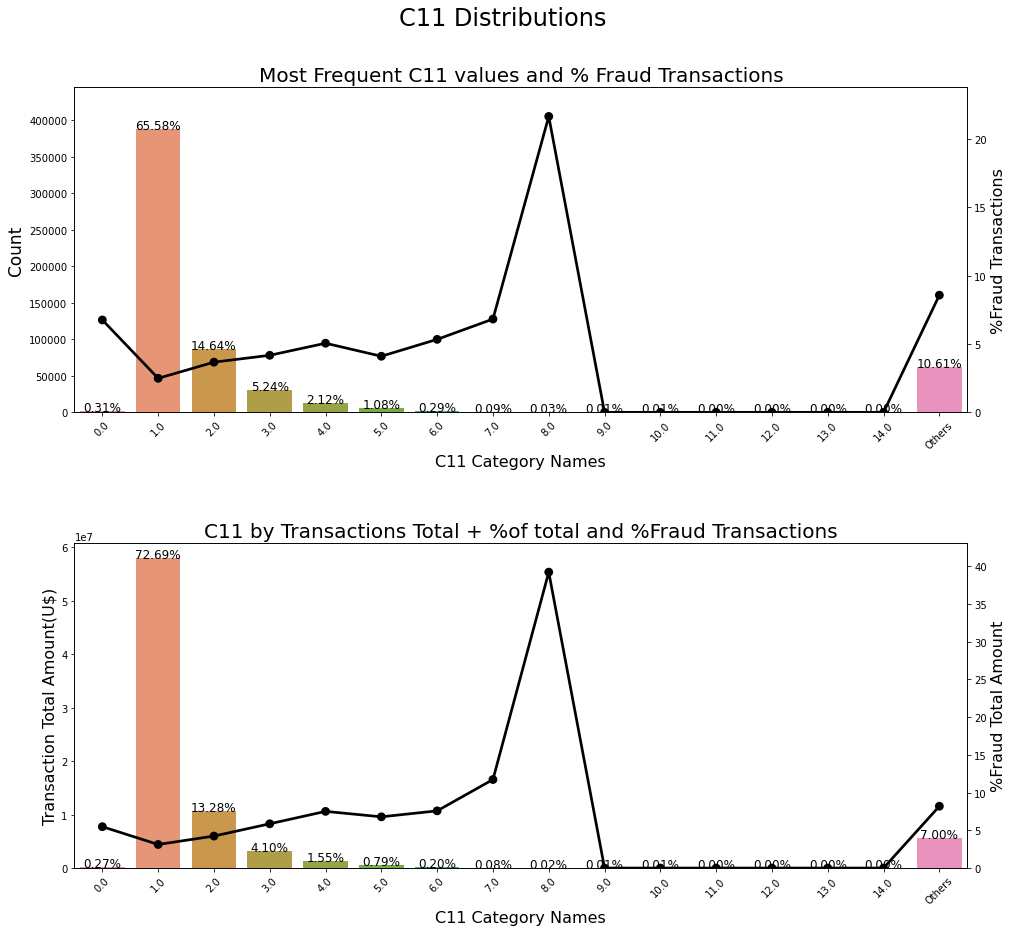

In [633]:
plot_cat_counts_and_percent_fraud(train, 'C11')

In [642]:
train = pd.read_csv(path/'train.csv', index_col=[0], low_memory=False)

In [643]:
train.loc[train.C2.isin(train.C2\
                              .value_counts()[train.C2.value_counts() <= 300 ]\
                              .index), 'C12'] = "Others"

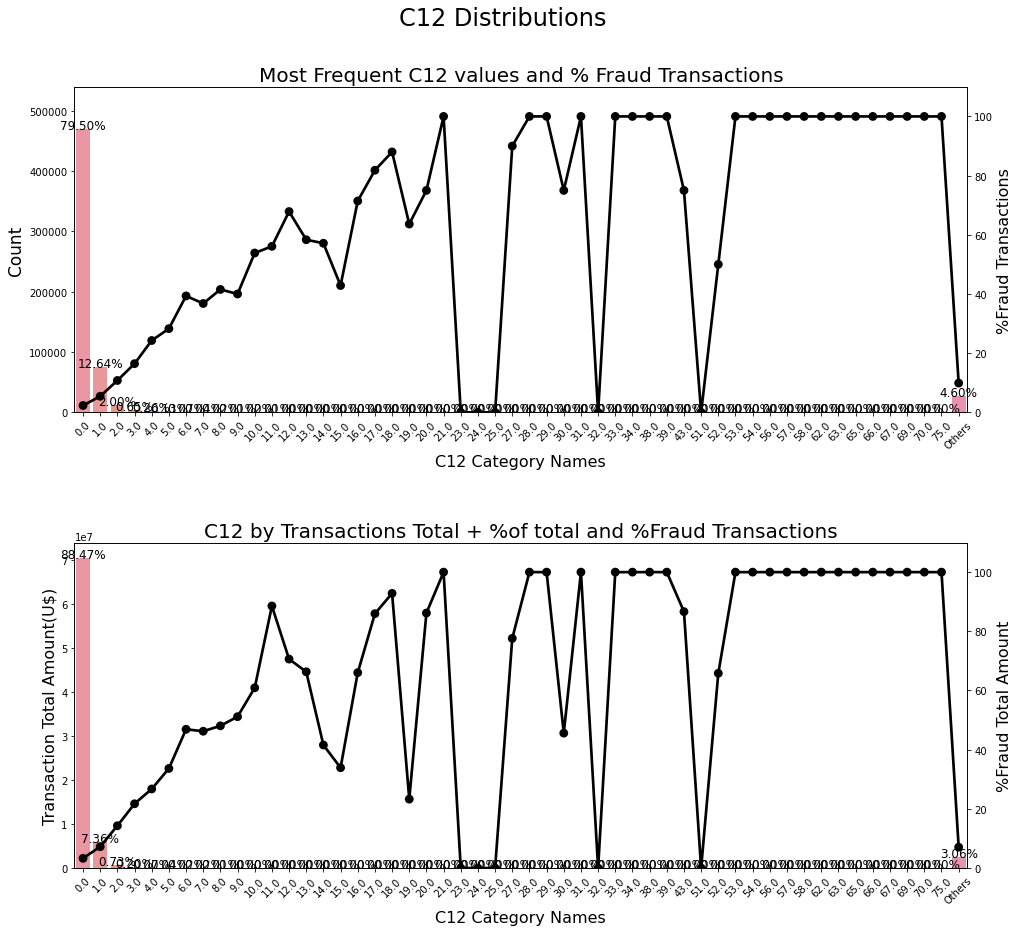

In [644]:
plot_cat_counts_and_percent_fraud(train, 'C12')

In [730]:
train = pd.read_csv(path/'train.csv', index_col=[0], low_memory=False)

In [731]:
train.loc[train.C2.isin(train.C2\
                              .value_counts()[train.C2.value_counts() <= 316261 ]\
                              .index), 'C13'] = "Others"

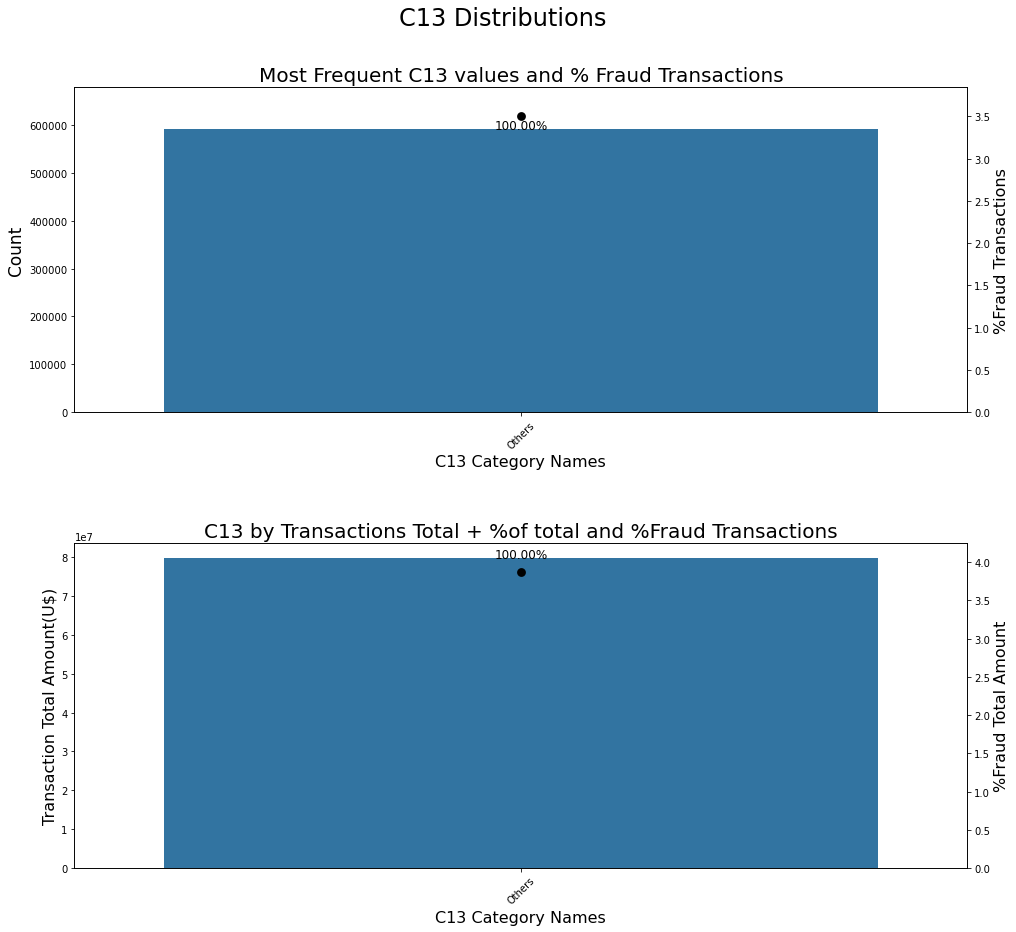

In [732]:
plot_cat_counts_and_percent_fraud(train, 'C13')

In [736]:
train = pd.read_csv(path/'train.csv', index_col=[0], low_memory=False)

In [737]:
train.loc[train.C2.isin(train.C2\
                              .value_counts()[train.C2.value_counts() <= 1000 ]\
                              .index), 'C14'] = "Others"

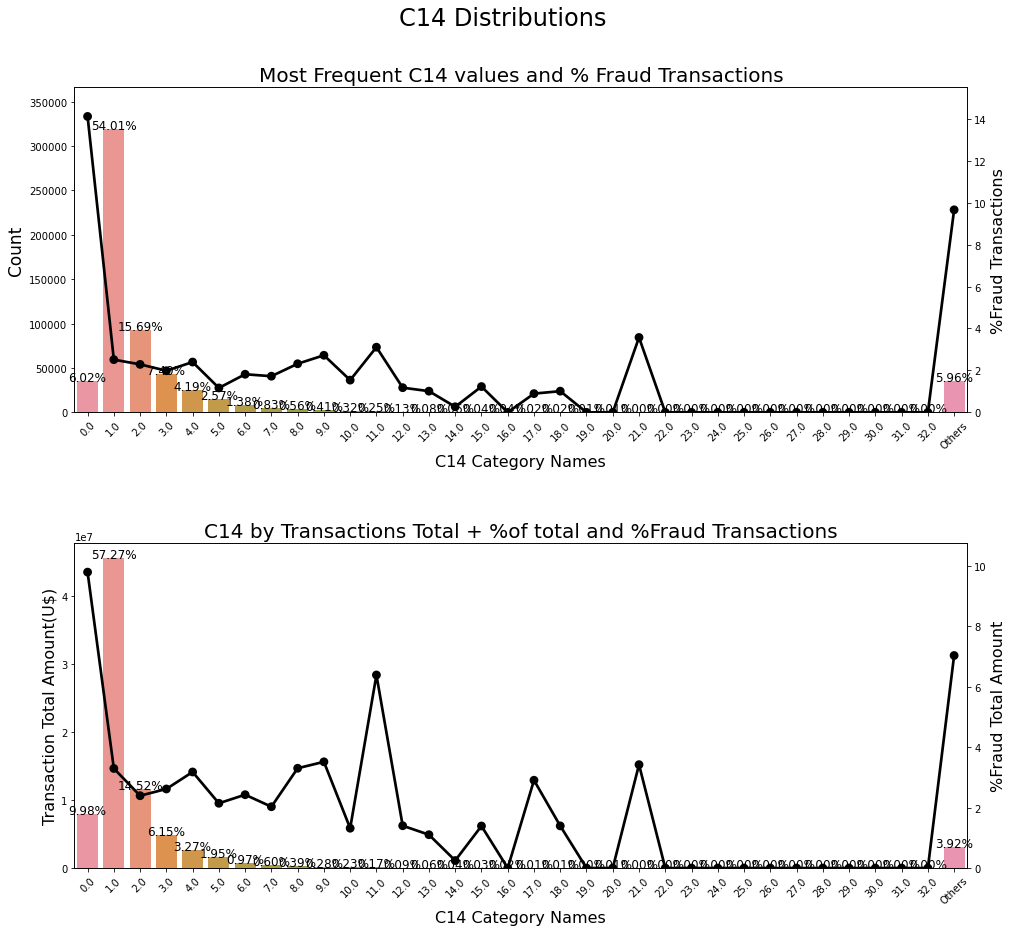

In [738]:
plot_cat_counts_and_percent_fraud(train, 'C14')

### D1 - D15  (continuous)

In [739]:
resumetable(train[['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8',
                   'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15']])

Dataset Shape: (590540, 15)


Name   dtypes  Missing  Uniques  First Value  Second Value  Third Value  \
0    D1  float64     1269      641         14.0           0.0          0.0   
1    D2  float64   280797      641          NaN           NaN          NaN   
2    D3  float64   262878      649         13.0           NaN          NaN   
3    D4  float64   168922      808          NaN           0.0          0.0   
4    D5  float64   309841      688          NaN           NaN          NaN   
5    D6  float64   517353      829          NaN           NaN          NaN   
6    D7  float64   551623      597          NaN           NaN          NaN   
7    D8  float64   515614    12353          NaN           NaN          NaN   
8    D9  float64   515614       24          NaN           NaN          NaN   
9   D10  float64    76022      818         13.0           0.0          0.0   
10  D11  float64   279287      676         13.0           NaN        315.0   
11  D12  float64   525823      635          NaN           NaN          NaN   
12  D13  float64   528588      577          NaN           NaN          NaN   
13  D14  float64   528353      802          NaN           NaN          NaN   
14  D15  float64    89113      859          0.0           0.0        315.0   

    Entropy  
0      5.57  
1      8.57  
2      5.60  
3      6.42  
4      5.95  
5      4.09  
6      4.29  
7     11.32  
8      4.29  
9      6.09  
10     6.73  
11     3.70  
12     2.26  
13     3.14  
14     6.88

In [542]:
print("Train, D Features Quantiles: ")
print(train[['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8',
                   'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15']].quantile([0.01, .025, .1, .25, .5, .75, .975, .99]))
print("Test, D Features Quantiles: ")
print(test[['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8',
                   'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15']].quantile([0.01, .025, .1, .25, .5, .75, .975, .99]))

Train, D Features Quantiles: 
          D1     D2     D3     D4     D5     D6     D7          D8        D9  \
0.010    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.000000  0.000000   
0.025    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.083333  0.000000   
0.100    0.0    4.0    0.0    0.0    0.0    0.0    0.0    0.583333  0.041666   
0.250    0.0   26.0    1.0    0.0    1.0    0.0    0.0    0.958333  0.208333   
0.500    3.0   97.0    8.0   26.0   10.0    0.0    0.0   37.875000  0.666666   
0.750  122.0  276.0   27.0  253.0   32.0   40.0   17.0  187.958328  0.833333   
0.975  549.0  584.0  225.0  587.0  362.0  480.0  368.0  879.036476  0.958333   
0.990  602.0  617.0  356.0  623.0  455.0  593.0  429.0  983.927063  0.958333   

         D10    D11    D12     D13    D14    D15  
0.010    0.0    0.0    0.0    0.00    0.0    0.0  
0.025    0.0    0.0    0.0    0.00    0.0    0.0  
0.100    0.0    0.0    0.0    0.00    0.0    0.0  
0.250    0.0    0.0    0.0    0.00    0.0    

In [800]:
train = pd.read_csv(path/'train.csv', index_col=[0], low_memory=False)

In [774]:
train.loc[train.C2.isin(train.C2\
                              .value_counts()[train.C2.value_counts() <= 310000 ]\
                              .index), 'D1'] = "Others"

In [781]:
train['D1'] = np.log(train['D1'] + 1)

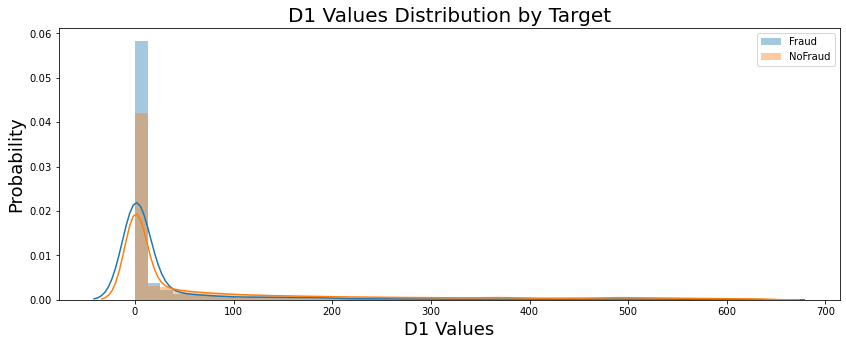

In [784]:
plot_distribution(train, 'D1')

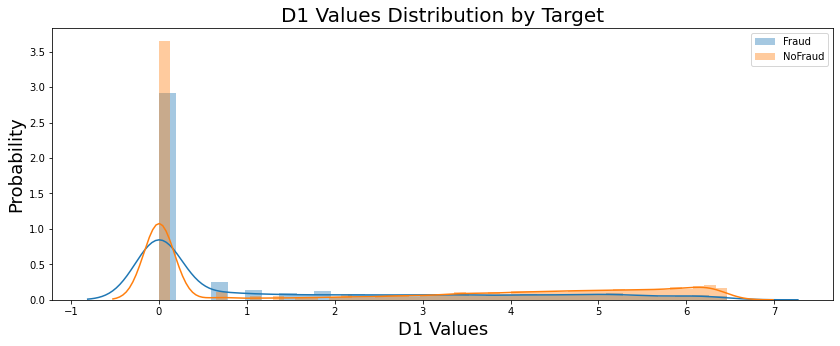

In [782]:
plot_distribution(train, 'D1')

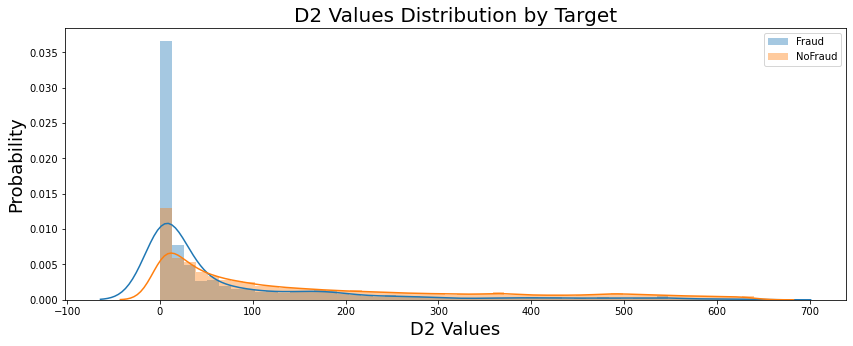

In [785]:
plot_distribution(train, 'D2')

In [787]:
train['D2'] = np.log(train['D2'] + 1)

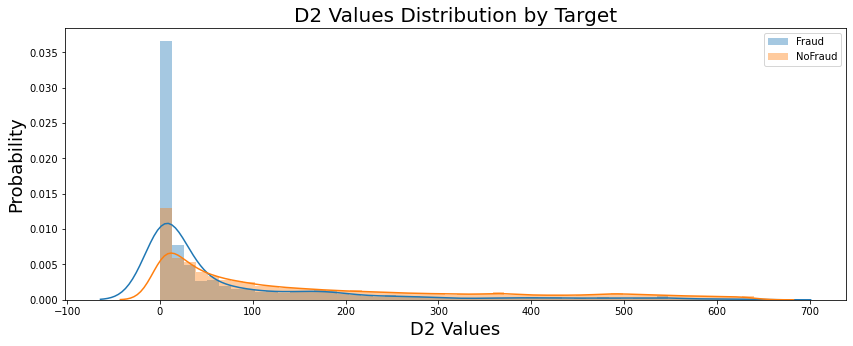

In [790]:
plot_distribution(train, 'D2')

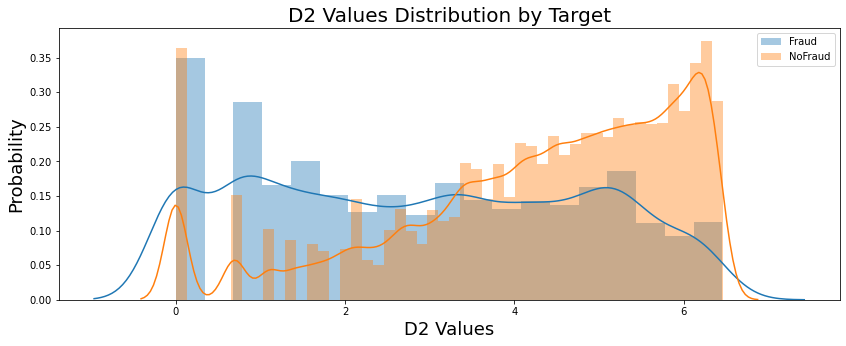

In [788]:
plot_distribution(train, 'D2')

In [792]:
train['D3'] = np.log(train['D3'] + 1)

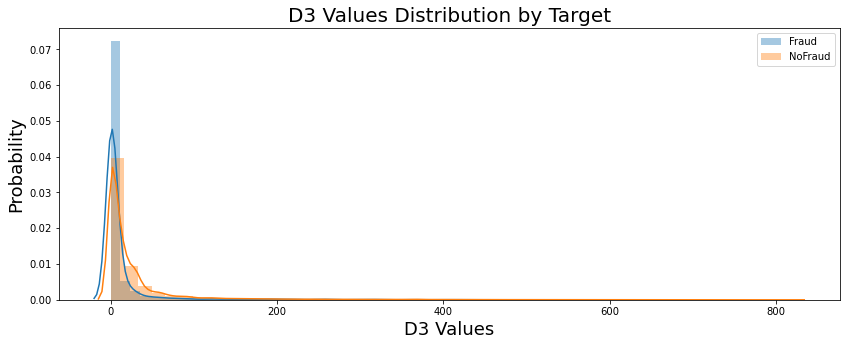

In [791]:
plot_distribution(train, 'D3')

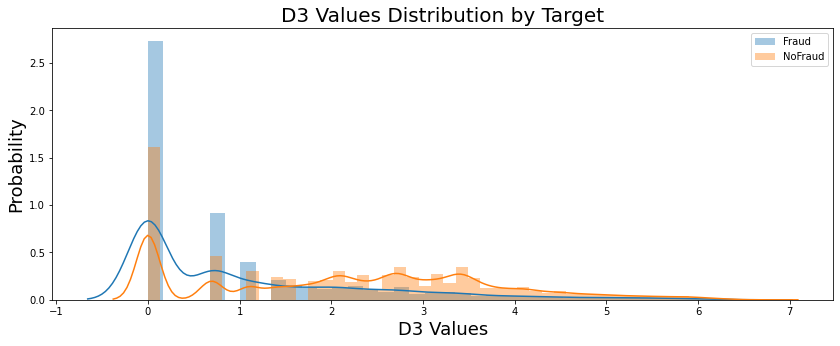

In [793]:
plot_distribution(train, 'D3')

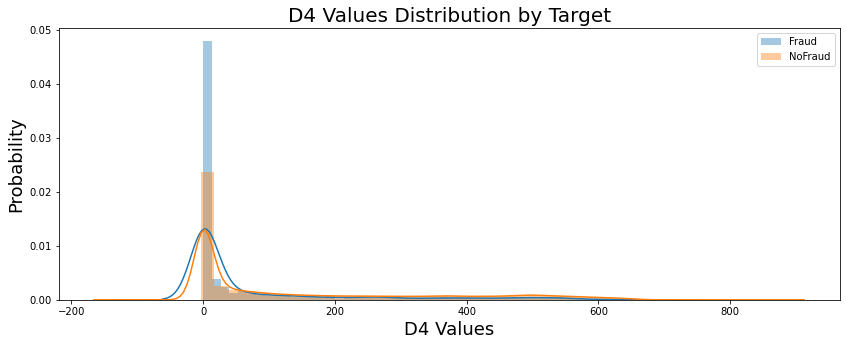

In [794]:
plot_distribution(train, 'D4')

In [799]:
train['D4']

0              NaN
1         0.000000
2         0.000000
3         4.553877
4              NaN
            ...   
590535         NaN
590536    0.000000
590537    0.000000
590538    3.135494
590539    0.693147
Name: D4, Length: 590540, dtype: float64

In [801]:
train['D4'] = np.log(train['D4'] + 2)

OverflowError: cannot convert float infinity to integer

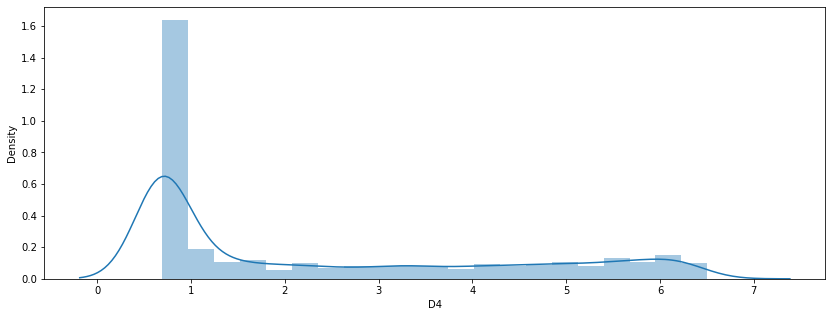

In [802]:
plot_distribution(train, 'D4')

### M1 - M9 (categorical)

In [433]:
resumetable(train[['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8',
                   'M9']])

Dataset Shape: (590540, 9)


Name  dtypes  Missing  Uniques First Value Second Value Third Value  Entropy
0   M1  object   271100        2           T          NaN           T     0.00
1   M2  object   271100        2           T          NaN           T     0.49
2   M3  object   271100        2           T          NaN           T     0.75
3   M4  object   281444        3          M2           M0          M0     1.31
4   M5  object   350482        2           F            T           F     0.99
5   M6  object   169360        2           T            T           F     1.00
6   M7  object   346265        2         NaN          NaN           F     0.57
7   M8  object   346252        2         NaN          NaN           F     0.95
8   M9  object   346252        2         NaN          NaN           F     0.63

### V1 - V339 (continuous)

In [436]:
resumetable(train[['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12',
 'V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26',
 'V27','V28',
 'V29','V30','V31','V32','V33','V34','V35','V36','V37','V38','V39','V40','V41','V42',
 'V43','V44','V45','V46','V47','V48','V49','V50','V51','V52','V53','V54','V55','V56',
 'V57','V58','V59','V60','V61','V62','V63','V64','V65','V66','V67','V68','V69','V70',
 'V71','V72','V73','V74','V75','V76','V77','V78','V79','V80','V81','V82','V83','V84',
 'V85','V86','V87','V88','V89','V90','V91','V92','V93','V94','V95','V96','V97','V98',
 'V99','V100','V101','V102','V103','V104','V105','V106','V107','V108','V109','V110',
 'V111','V112','V113','V114','V115','V116','V117','V118','V119','V120','V121','V122',
 'V123','V124','V125','V126','V127','V128','V129','V130','V131','V132','V133','V134',
 'V135','V136','V137','V138','V139','V140','V141','V142','V143','V144','V145','V146',
 'V147','V148','V149','V150','V151','V152','V153','V154','V155','V156','V157','V158',
 'V159','V160','V161','V162','V163','V164','V165','V166','V167','V168','V169','V170',
 'V171','V172','V173','V174','V175','V176','V177','V178','V179','V180','V181','V182',
 'V183','V184','V185','V186','V187','V188','V189','V190','V191','V192','V193','V194',
 'V195','V196','V197','V198','V199','V200','V201','V202','V203','V204','V205','V206',
 'V207','V208','V209','V210','V211','V212','V213','V214','V215','V216','V217','V218',
 'V219','V220','V221','V222','V223','V224','V225','V226','V227','V228','V229','V230',
 'V231','V232','V233','V234','V235','V236','V237','V238','V239','V240','V241','V242',
 'V243','V244','V245','V246','V247','V248','V249','V250','V251','V252','V253','V254',
 'V255','V256','V257','V258','V259','V260','V261','V262','V263','V264','V265','V266',
 'V267','V268','V269','V270','V271','V272','V273','V274','V275','V276','V277','V278',
 'V279','V280','V281','V282','V283','V284','V285','V286','V287','V288','V289','V290',
 'V291','V292','V293','V294','V295','V296','V297','V298','V299','V300','V301','V302',
 'V303','V304','V305','V306','V307','V308','V309','V310','V311','V312','V313','V314','V315',
 'V316','V317','V318','V319','V320','V321','V322','V323','V324','V325','V326','V327',
 'V328','V329','V330','V331','V332','V333','V334', 'V335', 'V336', 'V337','V338','V339']])

Dataset Shape: (590540, 339)


Name   dtypes  Missing  Uniques  First Value  Second Value  Third Value  \
0      V1  float64   279287        2          1.0           NaN          1.0   
1      V2  float64   279287        9          1.0           NaN          1.0   
2      V3  float64   279287       10          1.0           NaN          1.0   
3      V4  float64   279287        7          1.0           NaN          1.0   
4      V5  float64   279287        7          1.0           NaN          1.0   
5      V6  float64   279287       10          1.0           NaN          1.0   
6      V7  float64   279287       10          1.0           NaN          1.0   
7      V8  float64   279287        9          1.0           NaN          1.0   
8      V9  float64   279287        9          1.0           NaN          1.0   
9     V10  float64   279287        5          0.0           NaN          0.0   
10    V11  float64   279287        6          0.0           NaN          0.0   
11    V12  float64    76073        4          1.0           0.0          1.0   
12    V13  float64    76073        7          1.0           0.0          1.0   
13    V14  float64    76073        2          1.0           1.0          1.0   
14    V15  float64    76073        8          0.0           0.0          0.0   
15    V16  float64    76073       15          0.0           0.0          0.0   
16    V17  float64    76073       16          0.0           0.0          0.0   
17    V18  float64    76073       16          0.0           0.0          0.0   
18    V19  float64    76073        8          1.0           1.0          1.0   
19    V20  float64    76073       15          1.0           1.0          1.0   
20    V21  float64    76073        6          0.0           0.0          0.0   
21    V22  float64    76073        9          0.0           0.0          0.0   
22    V23  float64    76073       14          1.0           1.0          1.0   
23    V24  float64    76073       14          1.0           1.0          1.0   
24    V25  float64    76073        7          1.0           1.0          1.0   
25    V26  float64    76073       13          1.0           1.0          1.0   
26    V27  float64    76073        4          0.0           0.0          0.0   
27    V28  float64    76073        4          0.0           0.0          0.0   
28    V29  float64    76073        6          0.0           0.0          0.0   
29    V30  float64    76073        8          0.0           0.0          0.0   
30    V31  float64    76073        8          0.0           0.0          0.0   
31    V32  float64    76073       15          0.0           0.0          0.0   
32    V33  float64    76073        7          0.0           0.0          0.0   
33    V34  float64    76073       13          0.0           0.0          0.0   
34    V35  float64   168969        4          NaN           0.0          1.0   
35    V36  float64   168969        6          NaN           0.0          1.0   
36    V37  float64   168969       55          NaN           1.0          1.0   
37    V38  float64   168969       55          NaN           1.0          1.0   
38    V39  float64   168969       16          NaN           0.0          0.0   
39    V40  float64   168969       18          NaN           0.0          0.0   
40    V41  float64   168969        2          NaN           1.0          1.0   
41    V42  float64   168969        9          NaN           0.0          0.0   
42    V43  float64   168969        9          NaN           0.0          0.0   
43    V44  float64   168969       49          NaN           1.0          1.0   
44    V45  float64   168969       49          NaN           1.0          1.0   
45    V46  float64   168969        7          NaN           1.0          1.0   
46    V47  float64   168969        9          NaN           1.0          1.0   
47    V48  float64   168969        6          NaN           0.0          0.0   
48    V49  float64   168969        6          NaN           0.0          0.0   
49   

In [539]:
print("id_01 - id_11 Features Quantiles: ")
print(train[['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12',
 'V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26',
 'V27','V28',
 'V29','V30','V31','V32','V33','V34','V35','V36','V37','V38','V39','V40','V41','V42',
 'V43','V44','V45','V46','V47','V48','V49','V50','V51','V52','V53','V54','V55','V56',
 'V57','V58','V59','V60','V61','V62','V63','V64','V65','V66','V67','V68','V69','V70',
 'V71','V72','V73','V74','V75','V76','V77','V78','V79','V80','V81','V82','V83','V84',
 'V85','V86','V87','V88','V89','V90','V91','V92','V93','V94','V95','V96','V97','V98',
 'V99','V100','V101','V102','V103','V104','V105','V106','V107','V108','V109','V110',
 'V111','V112','V113','V114','V115','V116','V117','V118','V119','V120','V121','V122',
 'V123','V124','V125','V126','V127','V128','V129','V130','V131','V132','V133','V134',
 'V135','V136','V137','V138','V139','V140','V141','V142','V143','V144','V145','V146',
 'V147','V148','V149','V150','V151','V152','V153','V154','V155','V156','V157','V158',
 'V159','V160','V161','V162','V163','V164','V165','V166','V167','V168','V169','V170',
 'V171','V172','V173','V174','V175','V176','V177','V178','V179','V180','V181','V182',
 'V183','V184','V185','V186','V187','V188','V189','V190','V191','V192','V193','V194',
 'V195','V196','V197','V198','V199','V200','V201','V202','V203','V204','V205','V206',
 'V207','V208','V209','V210','V211','V212','V213','V214','V215','V216','V217','V218',
 'V219','V220','V221','V222','V223','V224','V225','V226','V227','V228','V229','V230',
 'V231','V232','V233','V234','V235','V236','V237','V238','V239','V240','V241','V242',
 'V243','V244','V245','V246','V247','V248','V249','V250','V251','V252','V253','V254',
 'V255','V256','V257','V258','V259','V260','V261','V262','V263','V264','V265','V266',
 'V267','V268','V269','V270','V271','V272','V273','V274','V275','V276','V277','V278',
 'V279','V280','V281','V282','V283','V284','V285','V286','V287','V288','V289','V290',
 'V291','V292','V293','V294','V295','V296','V297','V298','V299','V300','V301','V302',
 'V303','V304','V305','V306','V307','V308','V309','V310','V311','V312','V313','V314','V315',
 'V316','V317','V318','V319','V320','V321','V322','V323','V324','V325','V326','V327',
 'V328','V329','V330','V331','V332','V333','V334', 'V335', 'V336', 'V337','V338','V339']].quantile([0.01, .025, .1, .25, .5, .75, .975, .99]))

id_01 - id_11 Features Quantiles: 
        V1   V2   V3   V4   V5   V6   V7   V8   V9  V10  V11  V12  V13  V14  \
0.010  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0   
0.025  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0   
0.100  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0   
0.250  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0   
0.500  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
0.750  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
0.975  1.0  2.0  2.0  2.0  2.0  2.0  2.0  1.0  2.0  1.0  1.0  1.0  1.0  1.0   
0.990  1.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  1.0  2.0  1.0   

       V15  V16  V17  V18  V19  V20  V21  V22  V23  V24  V25  V26  V27  V28  \
0.010  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0   
0.025  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0   
0.100  0.0  0.0 

### id_1 - id_11 (continuous)

In [435]:
resumetable(train[['id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08',
                   'id_09', 'id_10', 'id_11']])

Dataset Shape: (590540, 11)


Name   dtypes  Missing  Uniques  First Value  Second Value  Third Value  \
0   id_01  float64   446307       77          NaN           NaN          NaN   
1   id_02  float64   449668   115655          NaN           NaN          NaN   
2   id_03  float64   524216       24          NaN           NaN          NaN   
3   id_04  float64   524216       15          NaN           NaN          NaN   
4   id_05  float64   453675       93          NaN           NaN          NaN   
5   id_06  float64   453675      101          NaN           NaN          NaN   
6   id_07  float64   585385       84          NaN           NaN          NaN   
7   id_08  float64   585385       94          NaN           NaN          NaN   
8   id_09  float64   515614       46          NaN           NaN          NaN   
9   id_10  float64   515614       62          NaN           NaN          NaN   
10  id_11  float64   449562      365          NaN           NaN          NaN   

    Entropy  
0      2.27  
1     16.72  
2      0.32  
3      0.10  
4      2.40  
5      2.63  
6      5.39  
7      5.72  
8      0.51  
9      0.30  
10     0.64

In [445]:
print("id_01 - id_11 Features Quantiles: ")
print(train[['id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08',
                   'id_09', 'id_10', 'id_11']].quantile([0.01, .025, .1, .25, .5, .75, .975, .99]))

id_01 - id_11 Features Quantiles: 
       id_01      id_02  id_03  id_04  id_05  id_06  id_07  id_08  id_09  \
0.010  -95.0    1089.71    0.0    0.0   -9.0 -100.0 -14.46 -100.0    0.0   
0.025  -50.0    2465.00    0.0    0.0   -5.0  -51.0  -8.00 -100.0    0.0   
0.100  -20.0   30762.00    0.0    0.0    0.0  -24.0   0.00  -91.2    0.0   
0.250  -10.0   67992.00    0.0    0.0    0.0   -6.0   5.00  -48.0    0.0   
0.500   -5.0  125800.50    0.0    0.0    0.0    0.0  14.00  -34.0    0.0   
0.750   -5.0  228749.00    0.0    0.0    1.0    0.0  22.00  -23.0    0.0   
0.975    0.0  625050.95    1.0    0.0   18.0    0.0  35.00    0.0    2.0   
0.990    0.0  770898.32    3.0    0.0   25.0    0.0  39.00    0.0    3.0   

       id_10       id_11  
0.010  -10.0   94.190002  
0.025   -1.0   95.160004  
0.100    0.0  100.000000  
0.250    0.0  100.000000  
0.500    0.0  100.000000  
0.750    0.0  100.000000  
0.975    0.0  100.000000  
0.990    0.0  100.000000  


### id_12 - id_38 (categorical)

In [437]:
resumetable(train[['id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 
                   'id_19','id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 
                   'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32',
                   'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38']]) 

Dataset Shape: (590540, 27)


Name   dtypes  Missing  Uniques First Value Second Value Third Value  \
0   id_12   object   446307        2         NaN          NaN         NaN   
1   id_13  float64   463220       54         NaN          NaN         NaN   
2   id_14  float64   510496       25         NaN          NaN         NaN   
3   id_15   object   449555        3         NaN          NaN         NaN   
4   id_16   object   461200        2         NaN          NaN         NaN   
5   id_17  float64   451171      104         NaN          NaN         NaN   
6   id_18  float64   545427       18         NaN          NaN         NaN   
7   id_19  float64   451222      522         NaN          NaN         NaN   
8   id_20  float64   451279      394         NaN          NaN         NaN   
9   id_21  float64   585381      490         NaN          NaN         NaN   
10  id_22  float64   585371       25         NaN          NaN         NaN   
11  id_23   object   585371        3         NaN          NaN         NaN   
12  id_24  float64   585793       12         NaN          NaN         NaN   
13  id_25  float64   585408      341         NaN          NaN         NaN   
14  id_26  float64   585377       95         NaN          NaN         NaN   
15  id_27   object   585371        2         NaN          NaN         NaN   
16  id_28   object   449562        2         NaN          NaN         NaN   
17  id_29   object   449562        2         NaN          NaN         NaN   
18  id_30   object   512975       75         NaN          NaN         NaN   
19  id_31   object   450258      130         NaN          NaN         NaN   
20  id_32  float64   512954        4         NaN          NaN         NaN   
21  id_33   object   517251      260         NaN          NaN         NaN   
22  id_34   object   512735        4         NaN          NaN         NaN   
23  id_35   object   449555        2         NaN          NaN         NaN   
24  id_36   object   449555        2         NaN          NaN         NaN   
25  id_37   object   449555        2         NaN          NaN         NaN   
26  id_38   object   449555        2         NaN          NaN         NaN   

    Entropy  
0      0.60  
1      2.57  
2      1.80  
3      1.33  
4      1.00  
5      1.27  
6      1.57  
7      5.42  
8      5.32  
9      4.63  
10     0.56  
11     1.22  
12     1.38  
13     4.46  
14     4.34  
15     0.03  
16     1.00  
17     1.00  
18     4.26  
19     4.67  
20     0.91  
21     4.28  
22     0.81  
23     0.99  
24     0.28  
25     0.75  
26     1.00

In [544]:
print("Train, id Features Quantiles: ")
print(train[['id_13', 'id_14', 'id_17', 'id_18', 
                   'id_19','id_20', 'id_21', 'id_22', 'id_24', 'id_25', 
                   'id_26', 'id_32']].quantile([0.01, .025, .1, .25, .5, .75, .975, .99]))
# print("Test, id Features Quantiles: ")
# print(test[['id_13', 'id_14', 'id_17', 'id_18', 
#                    'id_19','id_20', 'id_21', 'id_22', 'id_24', 'id_25', 
#                    'id_26', 'id_32']].quantile([0.01, .025, .1, .25, .5, .75, .975, .99]))

Train, id Features Quantiles: 
       id_13  id_14  id_17  id_18  id_19  id_20  id_21  id_22  id_24  id_25  \
0.010   14.0 -480.0  121.0   12.0  100.0  107.0  131.0   14.0   11.0  113.0   
0.025   15.0 -480.0  166.0   12.0  100.0  127.0  178.0   14.0   11.0  123.0   
0.100   27.0 -480.0  166.0   12.0  176.0  214.0  241.0   14.0   11.0  205.0   
0.250   49.0 -360.0  166.0   13.0  266.0  256.0  252.0   14.0   11.0  321.0   
0.500   52.0 -300.0  166.0   15.0  341.0  472.0  252.0   14.0   11.0  321.0   
0.750   52.0 -300.0  225.0   15.0  427.0  533.0  486.5   14.0   15.0  371.0   
0.975   64.0 -300.0  225.0   18.0  633.0  610.0  848.0   41.0   16.0  524.0   
0.990   64.0    0.0  225.0   20.0  633.0  612.0  849.0   41.0   21.0  528.0   

       id_26  id_32  
0.010  100.0   24.0  
0.025  100.0   24.0  
0.100  102.0   24.0  
0.250  119.0   24.0  
0.500  149.0   24.0  
0.750  169.0   32.0  
0.975  215.0   32.0  
0.990  216.0   32.0  


### Devicetype, DeviceInfo (categorical)

In [432]:
resumetable(train[['DeviceType', 'DeviceInfo']])

Dataset Shape: (590540, 2)


Name  dtypes  Missing  Uniques First Value Second Value Third Value  \
0  DeviceType  object   449730        2         NaN          NaN         NaN   
1  DeviceInfo  object   471874     1786         NaN          NaN         NaN   

   Entropy  
0     0.97  
1     4.37

## Creating simplified data sets for  experimentation

### Random sampling of the test set

Now I will create take a sample of this dataset to work with during experimentation.

In [18]:
# randomly sample the date without replacement
train_s = train.sample(frac=0.1, axis=0)   

In [19]:
assert train_s.columns.shape[0]==train.columns.shape[0] 

In [20]:
train_s.to_csv(path/'train_s.csv')

### Simplfication of data set

In [21]:
# train_s = pd.read_csv(path/'train_s.csv', index_col=[0], low_memory=False)
# test = pd.read_csv(path/'test.csv', index_col=[0], low_memory=False)

In [23]:
train_s.shape, test.shape

((59054, 434), (506691, 433))

In [15]:
train_s.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=434)

To simplify the dataset I will drop every collumn that records a Vxxx feature. There are over 339 such features many of which are highkly correllated.

In [16]:
train_ss = train_s.drop(list(train_s.filter(regex = 'V')), axis = 1)

In [17]:
assert len(train_ss.columns)==len(train_s.columns) - 339

In [18]:
train_ss.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain',
       'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8',
       'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4',
       'M5', 'M6', 'M7', 'M8', 'M9', 'id_01', 'id_02', 'id_03', 'id_04',
       'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12',
       'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20',
       'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28',
       'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36',
       'id_37', 'id_38', 'DeviceType', 'DeviceInfo'],
      dtype='object')

In [19]:
train_ss.to_csv(path/'train_ss.csv')